# **Global Developer Landscape Analysis 2024**

### Introduction

This project analyzes the Stack Overflow Developer Survey 2024, representing over 65,000 developers worldwide. By examining demographics, technology preferences, work environments, and economic factors, I've extracted actionable insights for developers planning careers, companies crafting talent strategies, and educators designing curricula.

My analysis used Python with pandas, matplotlib, and seaborn to process the data and create visualizations that reveal key patterns in the developer ecosystem. I supplemented the survey data with cost of living information to provide a more complete picture of global developer economics.

## Data Dictionary

### Primary Dataset: Stack Overflow Annual Developer Survey 2024

| Column Name | Description | Data Type |
|-------------|-------------|-----------|
| Age | Age group of respondent | Categorical |
| Country | Country of residence | Categorical |
| YearsCode | Total years coding (professional and non-professional) | Numeric |
| YearsCodePro | Years coding professionally | Numeric |
| EdLevel | Highest level of formal education | Categorical |
| DevType | Developer role(s), semicolon-separated for multiple roles | Text (Multiple Response) |
| RemoteWork | Current work arrangement (Remote, Hybrid, In-person) | Categorical |
| OrgSize | Size of current employer organization | Categorical |
| Industry | Industry sector of employment | Categorical |
| ConvertedCompYearly | Annual compensation in USD (normalized) | Numeric |
| JobSat | Job satisfaction rating (0-10 scale) | Numeric |
| LanguageHaveWorkedWith | Programming languages used, semicolon-separated | Text (Multiple Response) |
| DatabaseHaveWorkedWith | Database technologies used, semicolon-separated | Text (Multiple Response) |
| WebframeHaveWorkedWith | Web frameworks used, semicolon-separated | Text (Multiple Response) |
| LearnCode | Primary method of learning to code | Categorical |
| OpSysPersonal use | Operating system used for personal computing | Categorical |
| OpSysProfessional use | Operating system used for professional work | Categorical |

### Supplementary Dataset: Cost of Living Index by Country 2024

| Column Name | Description | Data Type |
|-------------|-------------|-----------|
| Country | Country name | Categorical |
| Cost of Living Plus Rent Index | Combined cost of living and rent index | Numeric |
| Local Purchasing Power Index | Index of local purchasing power | Numeric |

**Dataset Sources:**
- Primary dataset: Stack Overflow Annual Developer Survey 2024
- Supplementary dataset: Cost of Living Index by Country 2024

### Libraries and Setup

In [103]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib.patches import Patch

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
sns.set_theme(style='ticks', context="talk")
palette = "dark:b_r"  # Consistent color palette

# Customize visualization parameters for professional look
plt.rcParams.update({
    # Fonts and sizes
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica", "Arial", "DejaVu Sans"],
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "figure.titlesize": 20,

    # Remove top and right spines for a cleaner look
    "axes.spines.top": False,
    "axes.spines.right": False,
})

I established a consistent and professional visualization style upfront to ensure all charts would have a cohesive look throughout the analysis. This enhances readability and makes the final document more polished.

### Loading and Initial Exploration

In [104]:
# Load datasets
survey_df = pd.read_csv('../data/raw/survey_results_public.csv')
col_data = pd.read_csv('../data/raw/Cost_of_Living_Index_by_Country_2024.csv')

In [105]:
survey_df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [106]:
# Check basic dataset properties
print(f"Survey dataset shape: {survey_df.shape}")

Survey dataset shape: (65437, 114)


The Stack Overflow survey contains over 100 columns, many of which aren't relevant to my analysis questions. To make this dataset manageable, I need to:

1. Select only the most informative columns
2. Clean and transform data into analyzable formats
3. Handle missing values appropriately

### Column Selection

In [107]:
# Select relevant columns that align with our analysis goals
useful_columns = [
   # Core Demographics and Background
   'Age', 'Country', 'MainBranch', 'YearsCode', 'YearsCodePro', 
   'EdLevel', 'DevType', 'Employment', 'WorkExp', "ResponseId",
   
   # Work Environment
   'RemoteWork', 'OrgSize', 'Industry',
   
   # Compensation and Economics
   'CompTotal', 'ConvertedCompYearly', 'Currency', 'JobSat',
   
   # Technology Ecosystem
   'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
   'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
   'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
   'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
   
   # Professional Development
   'LearnCode', 'LearnCodeOnline', 'BuildvsBuy', 'PurchaseInfluence',
   "OpSysPersonal use", "OpSysProfessional use"
]

# Create a working copy with selected columns
df = survey_df[useful_columns].copy()

I carefully selected columns that would directly contribute to answering my questions while excluding those that would add unnecessary complexity. This keeps the analysis focused and manageable.

In [108]:
print(f"Working dataset dimensions: {df.shape}")

Working dataset dimensions: (65437, 31)


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     65437 non-null  object 
 1   Country                 58930 non-null  object 
 2   MainBranch              65437 non-null  object 
 3   YearsCode               59869 non-null  object 
 4   YearsCodePro            51610 non-null  object 
 5   EdLevel                 60784 non-null  object 
 6   DevType                 59445 non-null  object 
 7   Employment              65437 non-null  object 
 8   WorkExp                 29658 non-null  float64
 9   ResponseId              65437 non-null  int64  
 10  RemoteWork              54806 non-null  object 
 11  OrgSize                 47480 non-null  object 
 12  Industry                28858 non-null  object 
 13  CompTotal               33740 non-null  float64
 14  ConvertedCompYearly     23435 non-null

### Data Cleaning and Preprocessing

In [110]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing values by column:")
print(missing_values[missing_values > 0])

Missing values by column:
Country                    6507
YearsCode                  5568
YearsCodePro              13827
EdLevel                    4653
DevType                    5992
WorkExp                   35779
RemoteWork                10631
OrgSize                   17957
Industry                  36579
CompTotal                 31697
ConvertedCompYearly       42002
Currency                  18753
JobSat                    36311
LanguageHaveWorkedWith     5692
LanguageWantToWorkWith     9685
DatabaseHaveWorkedWith    15183
DatabaseWantToWorkWith    22879
WebframeHaveWorkedWith    20276
WebframeWantToWorkWith    26902
PlatformHaveWorkedWith    23071
PlatformWantToWorkWith    30905
LearnCode                  4949
LearnCodeOnline           16200
BuildvsBuy                22079
PurchaseInfluence         18031
OpSysPersonal use          7263
OpSysProfessional use     12464
dtype: int64


Missing value analysis revealed that every column has some degree of missing data. Rather than performing global imputation, I decided to handle missing values on a case-by-case basis within each analysis, using techniques appropriate to each research question.

In [111]:
# Standardize country names (example)
df['Country'] = df['Country'].str.replace('United Kingdom of Great Britain and Northern Ireland', "United Kingdom")
# Convert experience columns to numeric
df['YearsCode'] = pd.to_numeric(df.YearsCode, errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df.YearsCodePro, errors='coerce')

In [112]:
# Basic descriptive statistics
df.describe()

,YearsCode,YearsCodePro,WorkExp,ResponseId,CompTotal,ConvertedCompYearly,JobSat
count,59046.000000,48704.000000,29658.000000,65437.000000,3.374000e+04,2.343500e+04,29126.000000
mean,14.175998,10.739652,11.466957,32719.000000,2.963841e+145,8.615529e+04,6.935041
std,10.361047,8.935175,9.168709,18890.179119,5.444117e+147,1.867570e+05,2.088259
min,1.000000,1.000000,0.000000,1.000000,0.000000e+00,1.000000e+00,0.000000
25%,6.000000,4.000000,4.000000,16360.000000,6.000000e+04,3.271200e+04,6.000000
50%,11.000000,8.000000,9.000000,32719.000000,1.100000e+05,6.500000e+04,7.000000
75%,20.000000,15.000000,16.000000,49078.000000,2.500000e+05,1.079715e+05,8.000000
max,50.000000,50.000000,50.000000,65437.000000,1.000000e+150,1.625660e+07,10.000000


### Helper Functions for Multi-Response Fields

Many columns in the Stack Overflow survey contain semicolon-separated values representing multiple responses from a single respondent. I created reusable helper functions to handle these columns consistently throughout the analysis, allowing me to extract valuable insights from these complex fields.

In [113]:
# Function to split semicolon-separated responses and count frequencies
def count_items(column_series):
    all_responses = column_series.dropna().str.split(';')
    flattened = [item.strip() for sublist in all_responses for item in sublist if item.strip() != '']
    return Counter(flattened)

# Function to explode a multi-response column into individual rows
def explode_column(df, column):
    temp_df = df[[column, 'Country']].dropna().copy()
    temp_df[column] = temp_df[column].str.split(';')
    return temp_df.explode(column).assign(**{column: lambda x: x[column].str.strip()})

# **Data analysis and visualzation**

## **Demographics Analysis**

Understanding the developer community's demographic composition provides crucial context for all subsequent analyses. I wanted to examine:
1. Age distribution to understand generational representation
2. Experience levels to identify career progression patterns
3. Educational background to assess formal education's role in the industry

**Developer age distribution and age group percentage**

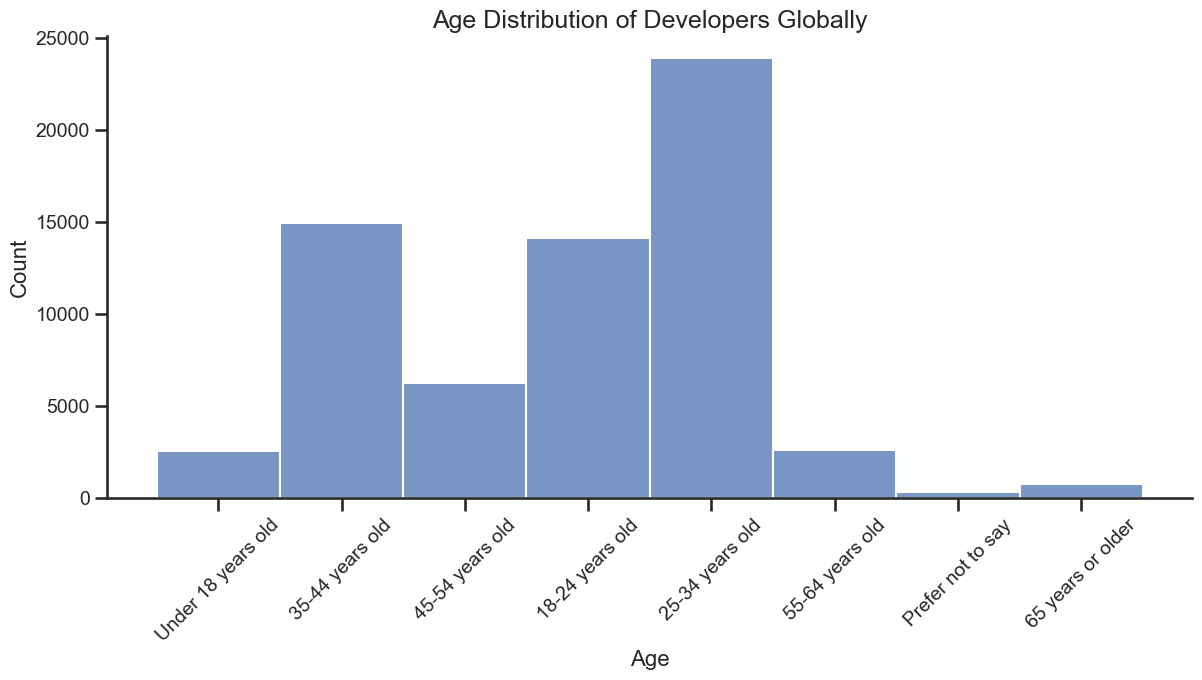

In [114]:
### Age Distribution
# Plot Age Distribution
plt.figure(figsize=(14, 6))
sns.histplot(df['Age'].dropna(), bins=30)
plt.title('Age Distribution of Developers Globally')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

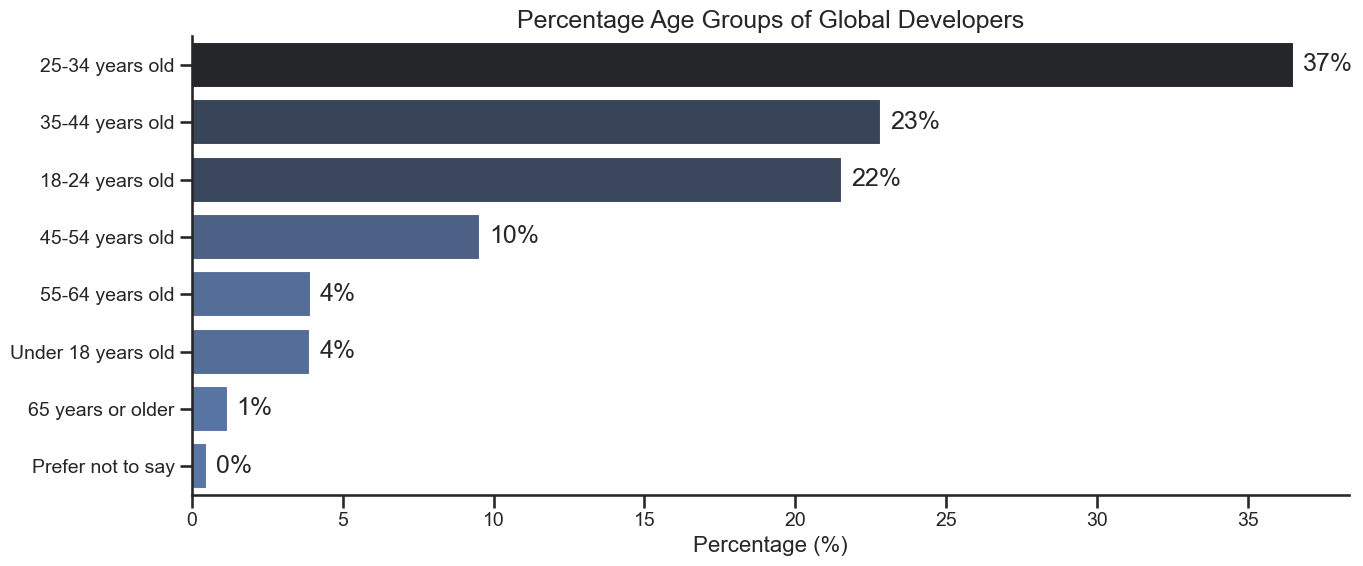

In [115]:
# Get counts and percentages
counts = df["Age"].value_counts()
total = len(df["Age"].dropna())
percentages = counts / total * 100

# Prepare DataFrame for plotting
ageprc_df = pd.DataFrame({
    'Age': percentages.index,
    'Percentage': percentages.values
})

# Plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='Percentage', y='Age', data=ageprc_df, hue='Percentage', palette=palette)

# Annotate bars with percentages
for i, perc in enumerate(ageprc_df['Percentage']):
    ax.text(perc + 0.3, i, f"{perc:.0f}%", va='center')

plt.title("Percentage Age Groups of Global Developers")
plt.xlabel("Percentage (%)")
plt.ylabel("")
plt.legend().remove()
plt.tight_layout()
plt.show()

- **25-34 age group dominates** (37% of developers)
- **82% of developers are under 45 years old**
- Only 5% of developers are 55 or older

**Experience Distribution and percentage**

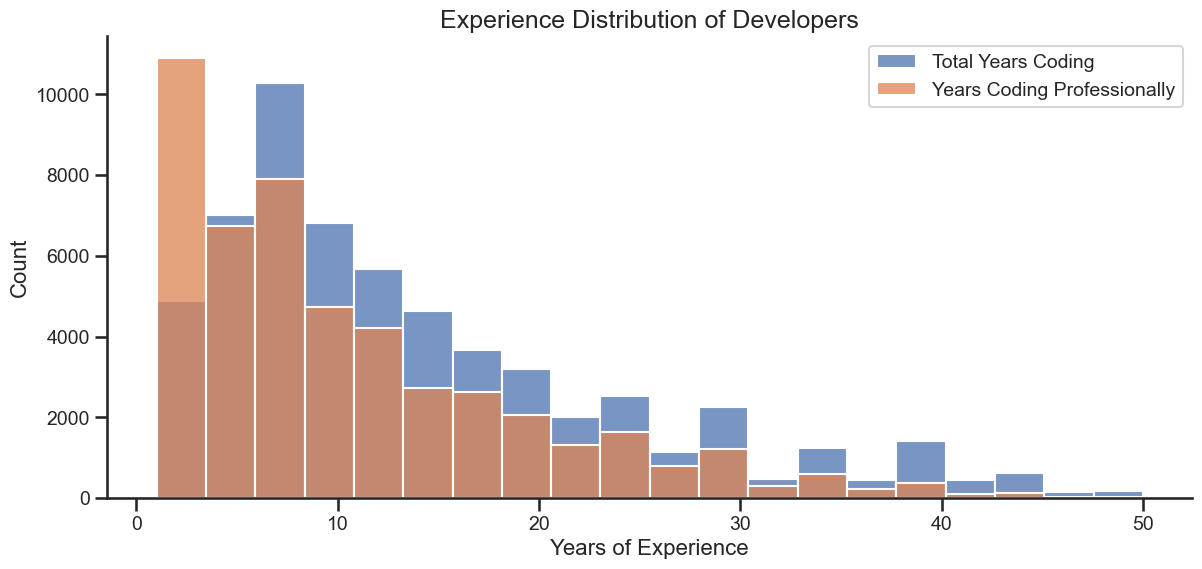

In [116]:
# Plot Experience Distributions
plt.figure(figsize=(14, 6))
sns.histplot(df['YearsCode'].dropna(), bins=20, label='Total Years Coding')
sns.histplot(df['YearsCodePro'].dropna(), bins=20, label='Years Coding Professionally')
plt.title('Experience Distribution of Developers')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.legend()
plt.show()

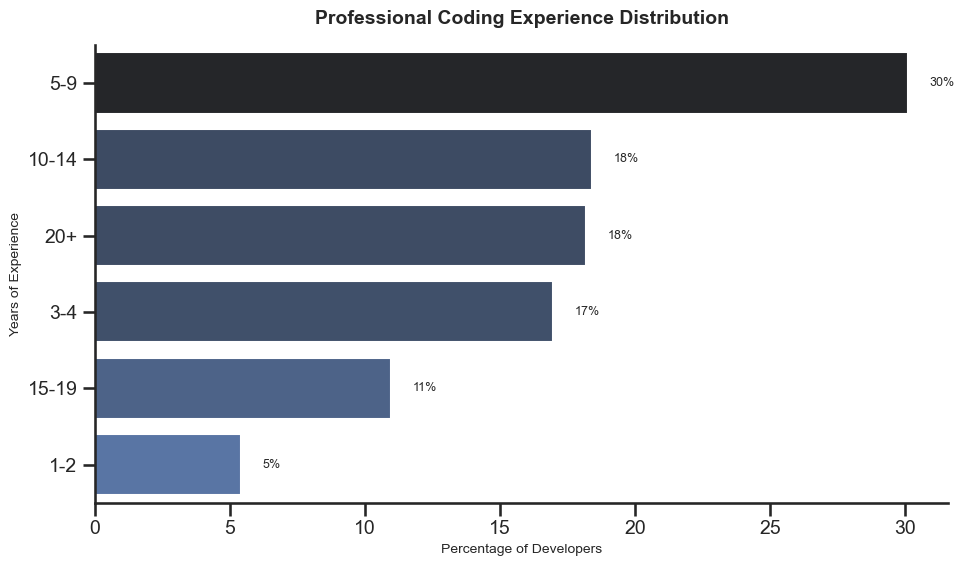

In [117]:
# Create experience bins
bins = [0, 2, 4, 9, 14, 19, float('inf')]
labels = ['1-2', '3-4', '5-9', '10-14', '15-19', '20+']

# Use YearsCodePro if available, fallback to YearsCode
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['ExpBin'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate percentages
exp_percent = (
    df['ExpBin']
    .value_counts(normalize=True)
    .reindex(labels)
    .dropna() * 100
).sort_values(ascending=True).reset_index()

exp_percent.columns = ['ExpBin', 'Percentage']

# Reverse the order of experience bins for plotting (top = most experienced)
exp_percent = exp_percent.sort_values(by='Percentage', ascending=False).reset_index(drop=True)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=exp_percent,
    y='ExpBin',
    x='Percentage',
    palette=palette,
    hue='Percentage'
)

# Add percentage labels
for index, row in exp_percent.iterrows():
    ax.text(row['Percentage'] + 0.8, index, f"{row['Percentage']:.0f}%", va='center', fontsize=9)

plt.title("Professional Coding Experience Distribution", fontsize=14, fontweight='semibold', pad=15)
plt.xlabel("Percentage of Developers", fontsize=10)
plt.ylabel("Years of Experience", fontsize=10)
plt.tight_layout()
plt.legend().remove()
plt.show()


- **5-9 years experience is most common** (30%)
- Experience distribution shows healthy pipeline across junior to senior levels
- Total years coding typically exceeds professional coding experience by 2-3 years

**Remote Work by Age group**


**Educational Background**

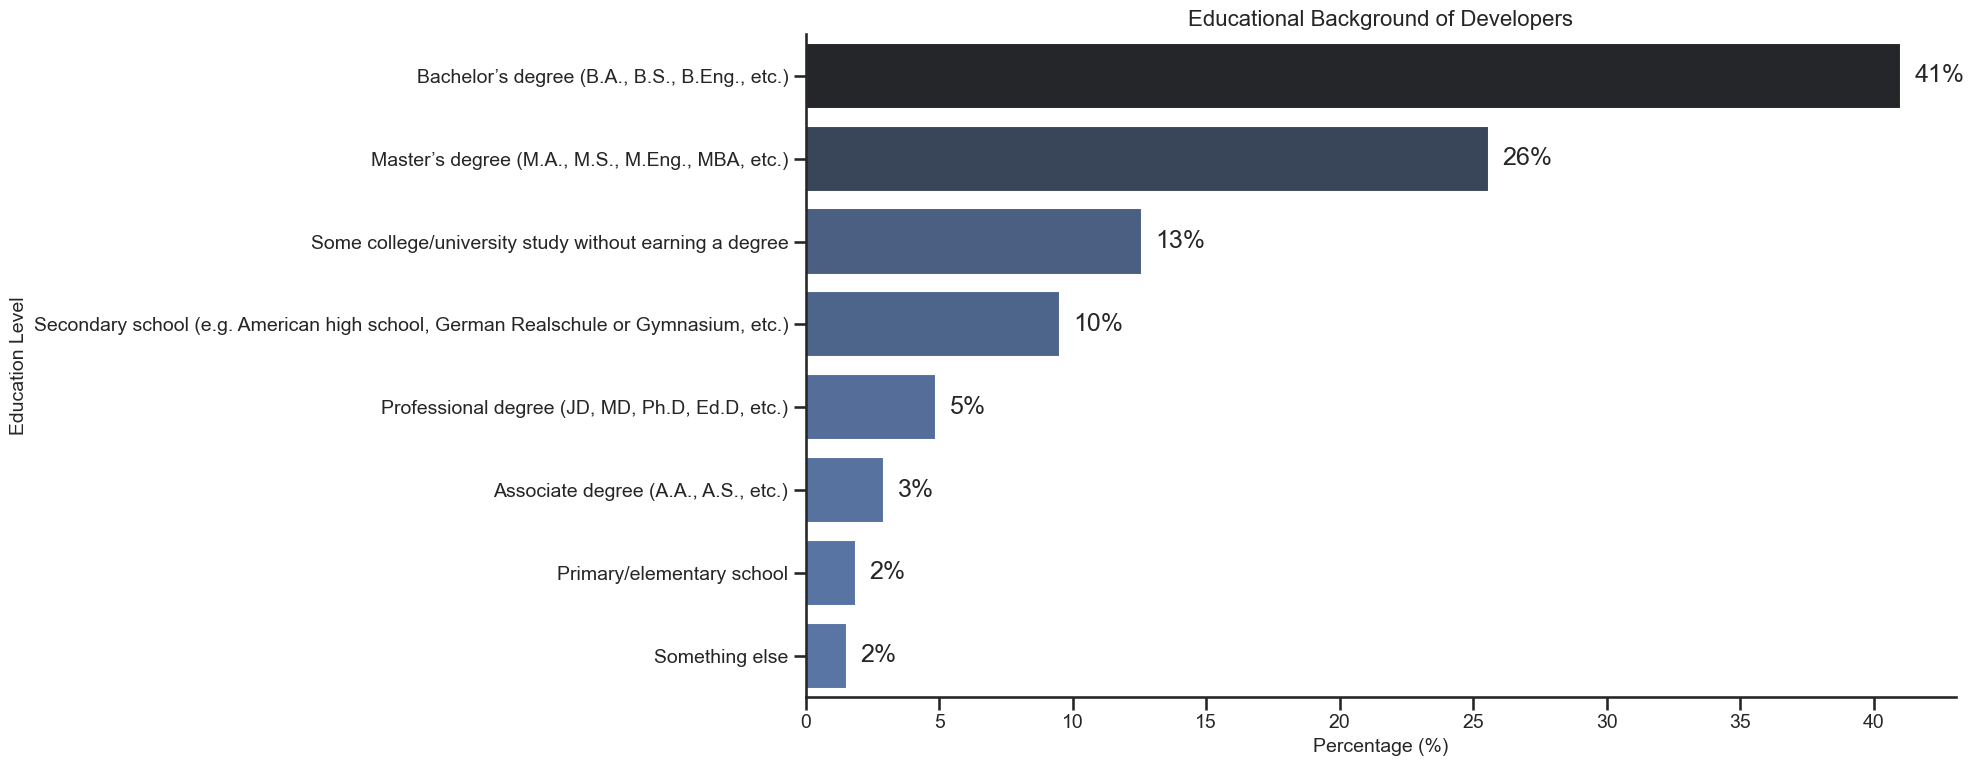

In [119]:
# Calculate percentage data
counts = df['EdLevel'].value_counts()
total = len(df['EdLevel'].dropna())
percentages = (counts / total) * 100

# Prepare DataFrame for plotting
edu_df = pd.DataFrame({
    'EdLevel': counts.index,
    'Percentage': percentages.values
})

# Sort values
edu_df = edu_df.sort_values(by='Percentage', ascending=False)

# Plot
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=edu_df, 
                 x='Percentage', 
                 y='EdLevel', 
                 palette=palette, 
                 hue='Percentage')

# Annotate each bar with percentage label
for i, perc in enumerate(edu_df['Percentage']):
    ax.text(perc + 0.5, i, f"{perc:.0f}%", va='center')

plt.title('Educational Background of Developers', fontsize=16)
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Education Level', fontsize=14)
plt.tight_layout()
plt.legend().remove()
plt.show()

- **67% have at least a Bachelor's degree**
- 23% entered the field without completing college
- Only 5% have professional degrees (PhD, JD, MD)

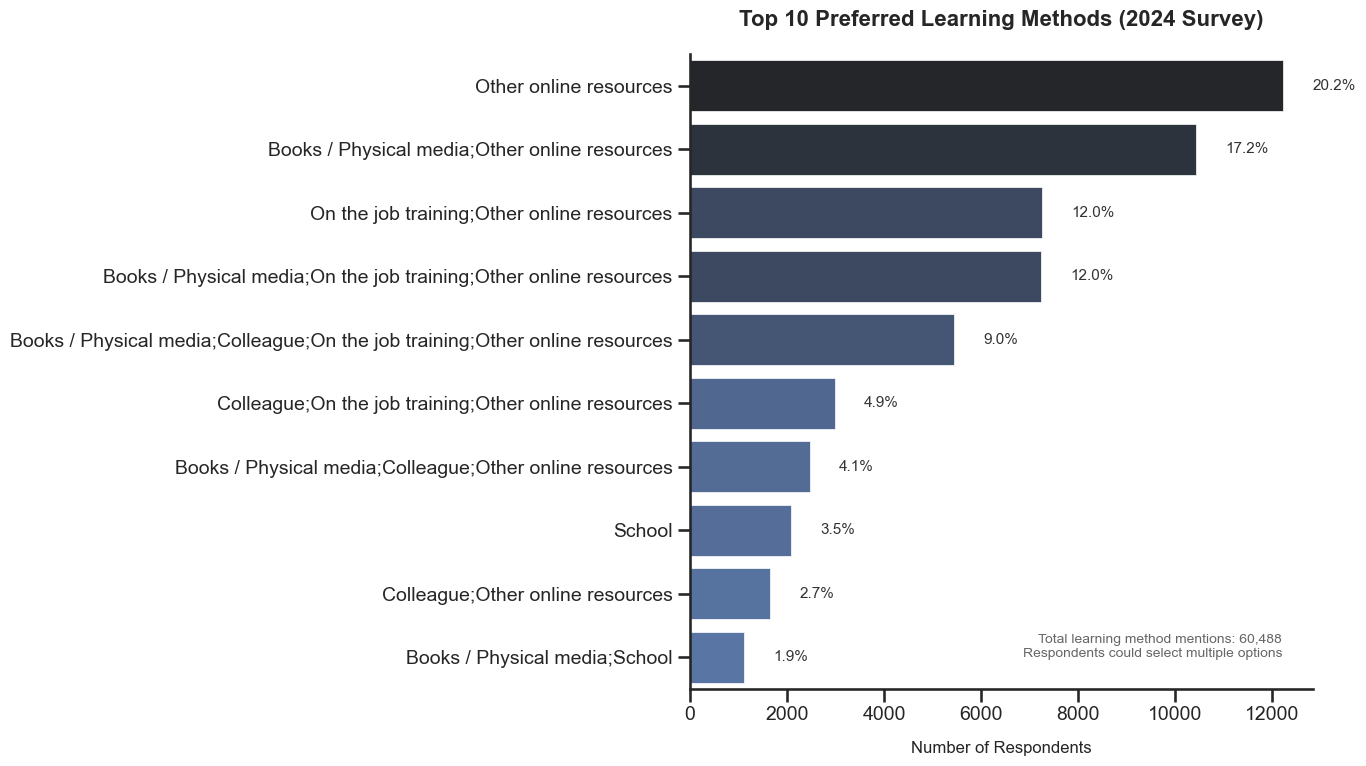

In [149]:
# Clean learning method data
df['LearnCode'] = df['LearnCode'].str.split('(').str[0].str.strip()

# Get value counts and reset index
learning_methods_df = df['LearnCode'].value_counts().reset_index()
learning_methods_df.columns = ['Method', 'Count']

# Calculate percentage
total_responses = learning_methods_df['Count'].sum()
learning_methods_df['Percentage'] = (learning_methods_df['Count'] / total_responses * 100).round(1)

# Create visualization
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Count', 
                y='Method', 
                data=learning_methods_df.head(10),
                palette=palette,
                hue='Percentage',
                edgecolor='w',
                linewidth=0.5)

plt.title("Top 10 Preferred Learning Methods (2024 Survey)", 
         fontsize=16, fontweight='semibold', pad=20)
plt.xlabel("Number of Respondents", fontsize=12, labelpad=12)
plt.ylabel("")

# Add percentage labels
for i, (count, pct) in enumerate(zip(learning_methods_df['Count'], learning_methods_df['Percentage'])):
    if i >= 10:  # Only label top 10
        break
    ax.text(count + total_responses*0.01,
            i,
            f'{pct}%', 
            va='center',
            fontsize=11,
            color='#333333')

# Add context annotation
plt.text(0.95, 0.05, 
        f"Total learning method mentions: {total_responses:,}\n" 
        "Respondents could select multiple options",
        transform=ax.transAxes,
        ha='right',
        fontsize=10,
        color='#666666')

plt.tight_layout()
plt.legend().remove()
plt.show()

- **Online resources dominate learning preferences** (20.2%)
- Combined learning approaches (books + online + on-job training) are common
- Formal education (school) ranks low (3.5%) as a standalone learning method

## **Developer technology**

**Programing Languages**

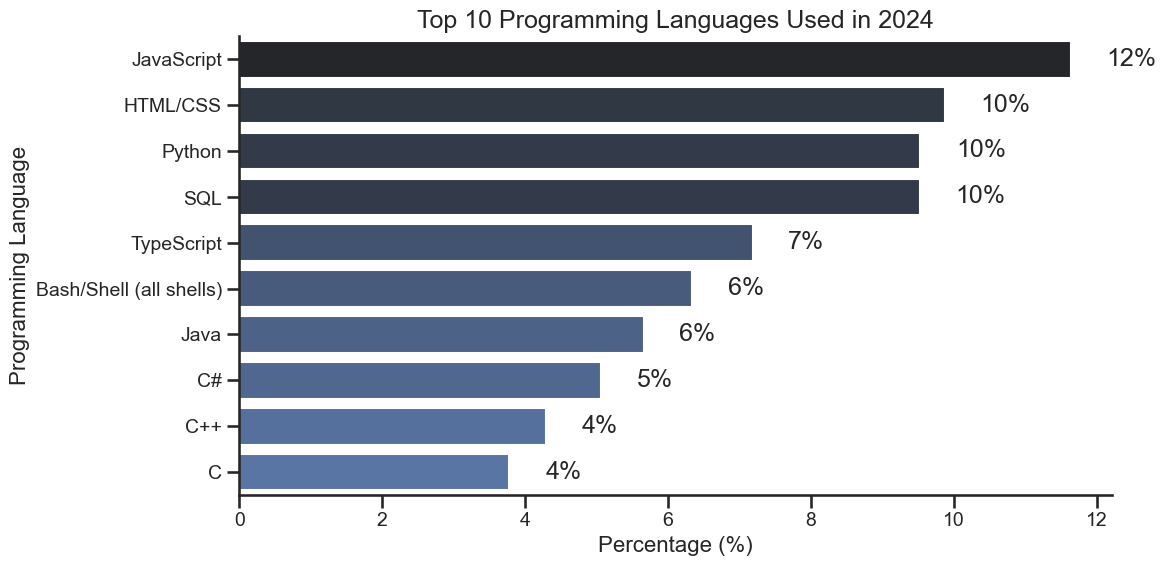

In [120]:
# Process language data
language_counts = count_items(df['LanguageHaveWorkedWith'])
lang_df = pd.DataFrame(language_counts.items(), columns=['Language', 'Count'])
total_lang = lang_df['Count'].sum()
lang_df['Percentage'] = lang_df['Count'] / total_lang * 100
lang_df = lang_df.sort_values(by='Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Percentage', y='Language', data=lang_df, hue='Percentage', palette=palette)

# Add percentage labels
for i, perc in enumerate(lang_df['Percentage']):
    ax.text(perc + 0.5, i, f'{perc:.0f}%', va='center')

plt.title("Top 10 Programming Languages Used in 2024")
plt.xlabel("Percentage (%)")
plt.ylabel("Programming Language")
plt.tight_layout()
plt.legend().remove()
plt.show()

- **JavaScript maintains leadership** (12%)
- Python, HTML/CSS, and SQL all tied at 10%
- TypeScript showing strong adoption (7%)

**Web Frameworks**

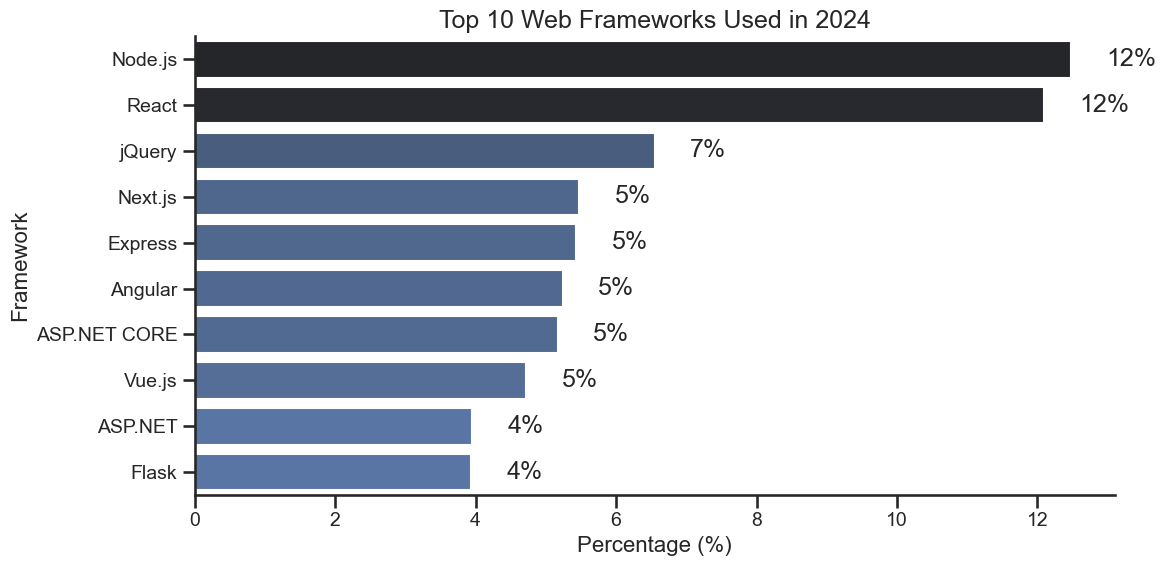

In [121]:
# Process framework data
framework_counts = count_items(df['WebframeHaveWorkedWith'])
fw_df = pd.DataFrame(framework_counts.items(), columns=['Framework', 'Count'])
total_fw = fw_df['Count'].sum()
fw_df['Percentage'] = fw_df['Count'] / total_fw * 100
fw_df = fw_df.sort_values(by='Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Percentage', y='Framework', data=fw_df, hue='Percentage', palette=palette)

# Add percentage labels
for i, perc in enumerate(fw_df['Percentage']):
    ax.text(perc + 0.5, i, f'{perc:.0f}%', va='center')

plt.title("Top 10 Web Frameworks Used in 2024")
plt.xlabel("Percentage (%)")
plt.ylabel("Framework")
plt.tight_layout()
plt.legend().remove()
plt.show()

- **Node.js and React tied as most popular** (12% each)
- jQuery remains surprisingly relevant (7%)
- Modern frameworks (Next.js, Express, Angular, Vue.js) show balanced adoption

**Databases used**

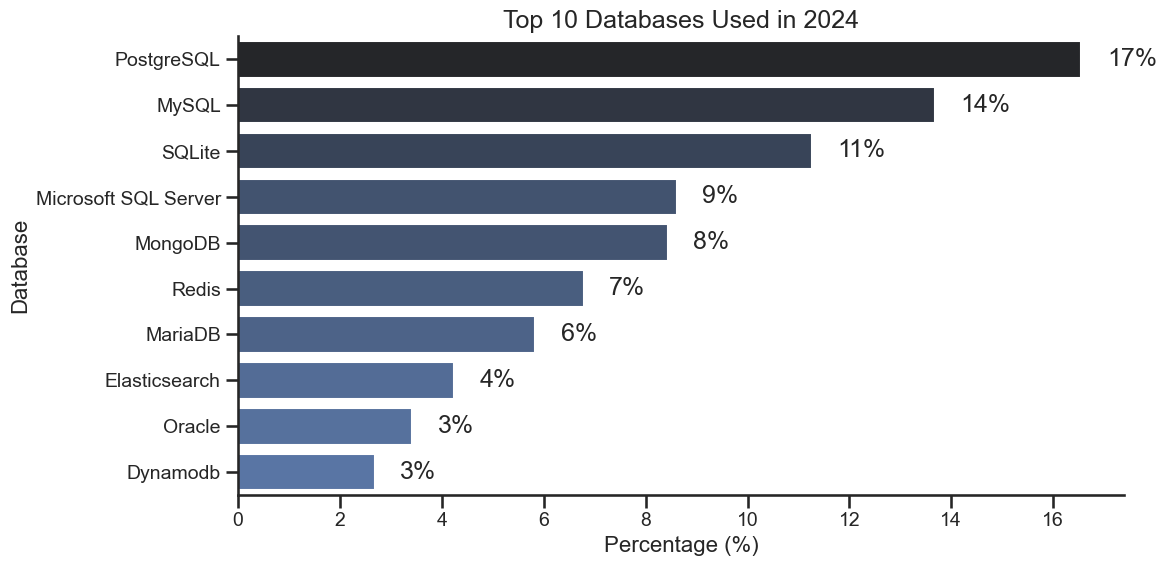

In [122]:
# Process database data
database_counts = count_items(df['DatabaseHaveWorkedWith'])
database_df = pd.DataFrame(database_counts.items(), columns=['Database', 'Count'])
total_db = database_df['Count'].sum()
database_df['Percentage'] = database_df['Count'] / total_db * 100
database_df = database_df.sort_values(by='Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Percentage', y='Database', hue='Percentage', data=database_df, palette=palette)

# Add percentage labels
for i, perc in enumerate(database_df['Percentage']):
    ax.text(perc + 0.5, i, f'{perc:.0f}%', va='center')

plt.title("Top 10 Databases Used in 2024")
plt.xlabel("Percentage (%)")
plt.ylabel("Database")
plt.tight_layout()
plt.legend().remove()
plt.show()

- **PostgreSQL leads database usage** (17%)
- Traditional SQL databases dominate (PostgreSQL, MySQL, SQLite, MS SQL Server)
- MongoDB (8%) is the leading NoSQL option

**Operating Systems**

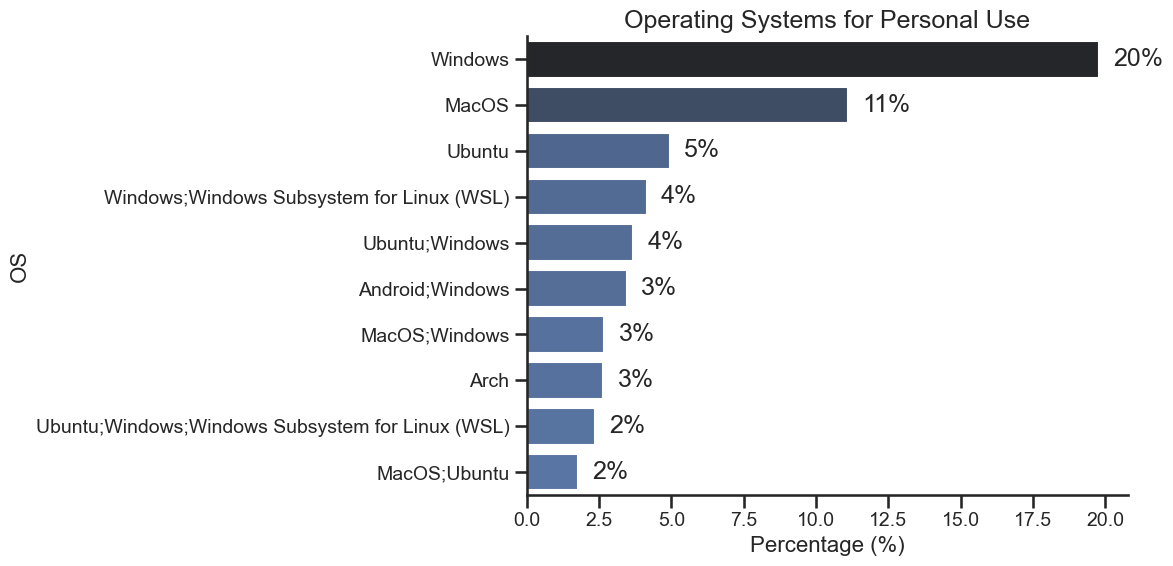

In [123]:
# Process personal OS data
personal_os = df['OpSysPersonal use'].value_counts()
personal_pct = df['OpSysPersonal use'].value_counts(normalize=True) * 100

# Prepare DataFrame
personal_df = pd.DataFrame({
    'OS': personal_os.index,
    'Count': personal_os.values,
    'Percentage': personal_pct.values
})

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Percentage', y='OS', hue='Percentage', data=personal_df.head(10), palette=palette)

# Add percentage labels
for i, perc in enumerate(personal_df['Percentage'].head(10)):
    ax.text(perc + 0.5, i, f'{perc:.0f}%', va='center')

plt.title("Operating Systems for Personal Use")
plt.xlabel("Percentage (%)")
plt.ylabel("OS")
plt.tight_layout()
plt.legend().remove()
plt.show()

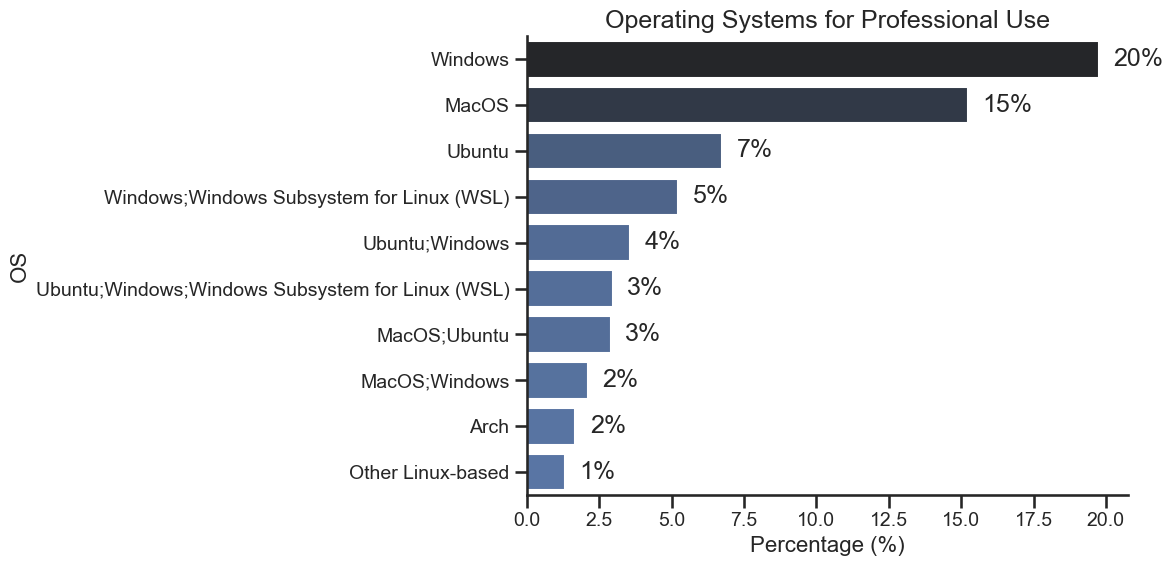

In [124]:
# Process professional OS data
prof_os = df['OpSysProfessional use'].value_counts()
prof_pct = df['OpSysProfessional use'].value_counts(normalize=True) * 100

# Prepare DataFrame
prof_df = pd.DataFrame({
    'OS': prof_os.index,
    'Count': prof_os.values,
    'Percentage': prof_pct.values
})

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Percentage', y='OS', hue='Percentage', data=prof_df.head(10), palette=palette)

# Add percentage labels
for i, perc in enumerate(prof_df['Percentage'].head(10)):
    ax.text(perc + 0.5, i, f'{perc:.0f}%', va='center')

plt.title("Operating Systems for Professional Use")
plt.xlabel("Percentage (%)")
plt.ylabel("OS")
plt.tight_layout()
plt.legend().remove()
plt.show()

- **Windows dominates both personal and professional use** (20% each)
- MacOS usage increases from 11% for personal to 15% for professional use
- Linux distributions (especially Ubuntu) show strong professional adoption

## **Correlations Between Key Variables**

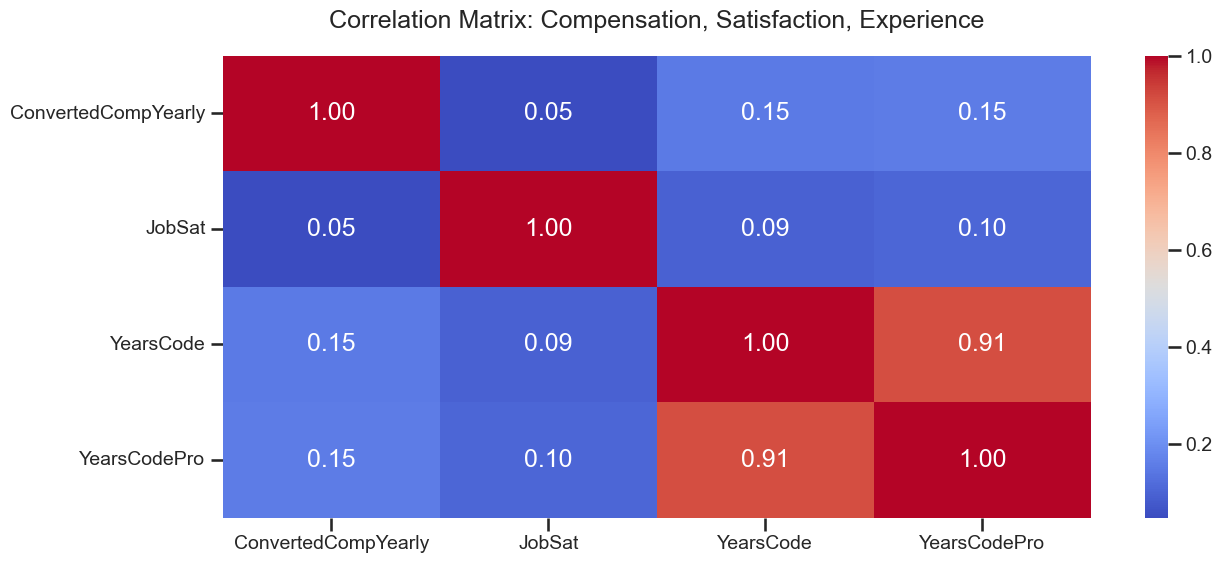

In [126]:
# Define numeric columns for correlation analysis
numeric_cols = ['ConvertedCompYearly', 'JobSat', 'YearsCode', 'YearsCodePro']

# Drop rows with missing values in these columns
corr_df = df[numeric_cols].dropna()

# Create correlation heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Compensation, Satisfaction, Experience", pad=20)
plt.show()

- **Years of coding experience highly correlated with professional experience** (0.91)
- **Weak correlation between compensation and job satisfaction** (0.05)
- Experience shows modest correlation with compensation (0.15)

## **Job Type Analysis**

**Job Type Distribution**

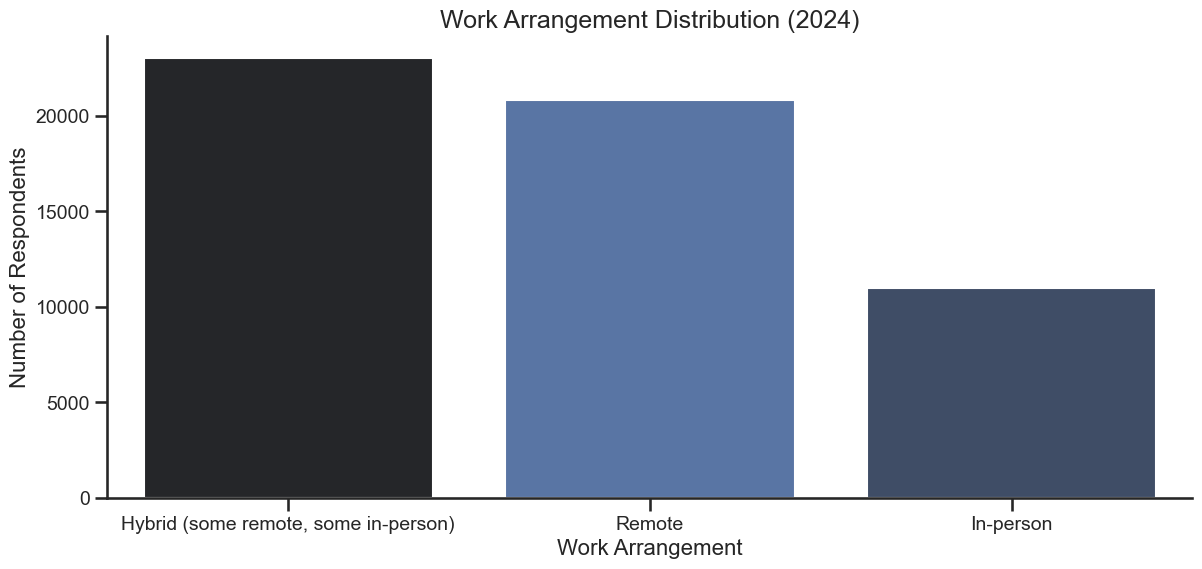

In [127]:
# Plot work arrangement distribution
plt.figure(figsize=(14, 6))
sns.countplot(x='RemoteWork', data=df, order=df['RemoteWork'].value_counts().index, hue='RemoteWork', palette=palette)
plt.title("Work Arrangement Distribution (2024)")
plt.xlabel("Work Arrangement")
plt.ylabel("Number of Respondents")
plt.legend().remove()
plt.show()

- **Hybrid work arrangement is most common** (approximately 23,000 respondents)
- Remote work nearly as common as hybrid (approximately 21,000 respondents)
- In-person work least common (approximately 11,000 respondents)

**Remote Work by Age Group**

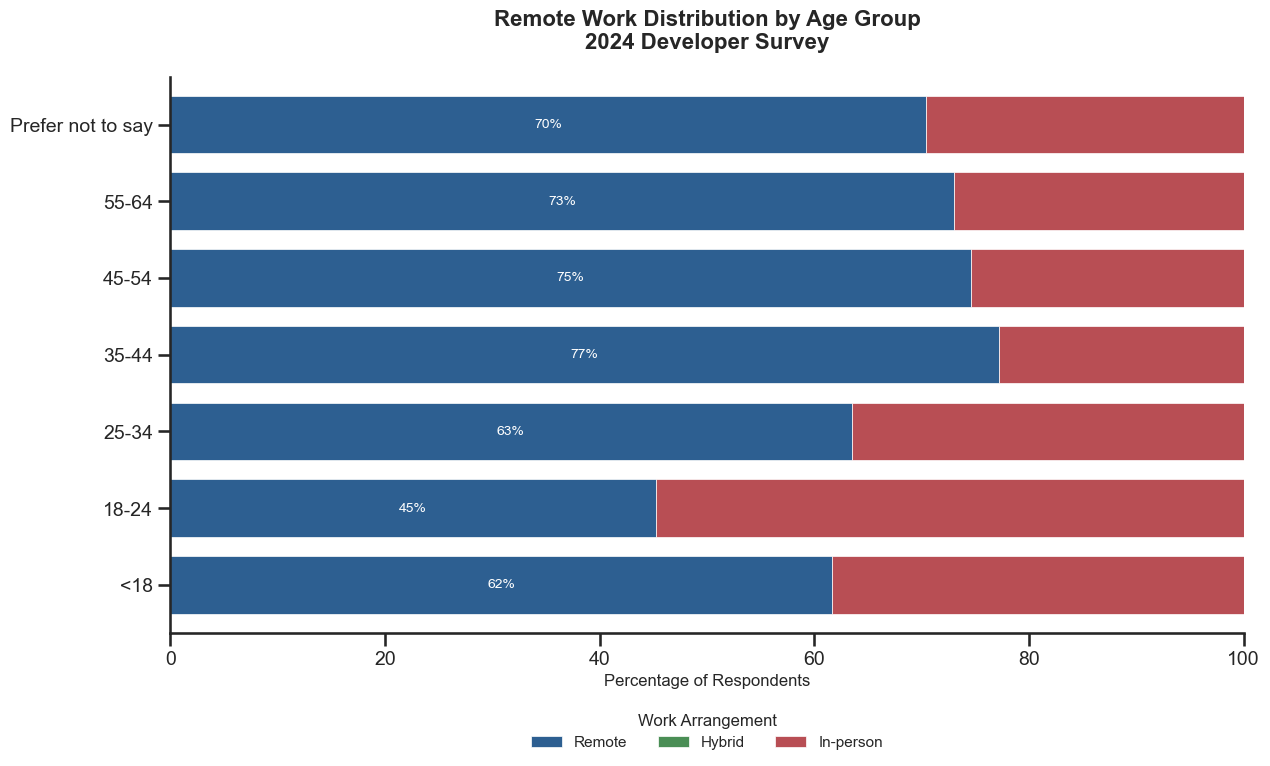

In [128]:
# Define numerical age groups
age_order = [
    '<18', '18-24', '25-34', '35-44',
    '45-54', '55-64', '65+', 'Prefer not to say'
]

# Clean and convert age labels
df['Age'] = df['Age'].str.replace('Under ', '<')\
                     .str.replace(' years old', '')\
                     .str.replace(' or older', '+')

# Create categorical age bins
df['AgeBin'] = pd.Categorical(
    df['Age'],
    categories=age_order,
    ordered=True
)

# Calculate percentages
age_grouped = (
    df[df['AgeBin'].notna()]
    .groupby(['AgeBin', 'RemoteWork'], observed=True)
    .size()
    .unstack(fill_value=0)
    .reindex(columns=['Remote', 'Hybrid', 'In-person'])
)

age_percentages = age_grouped.div(age_grouped.sum(axis=1), axis=0) * 100

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(14, 9))
fig.subplots_adjust(left=0.3, right=0.9, top=0.85, bottom=0.2)

age_percentages.plot(
    kind='barh',
    stacked=True,
    color=['#2d5f91', '#4a8e55', '#b84e54'],
    width=0.75,
    ax=ax,
    edgecolor='w',
    linewidth=0.5
)

plt.title("Remote Work Distribution by Age Group\n2024 Developer Survey", 
         fontsize=16, fontweight='semibold', pad=20)
plt.xlabel("Percentage of Respondents", fontsize=12)
plt.ylabel("")
plt.xlim(0, 100)

# Add percentage labels for largest segments
for i, (idx, row) in enumerate(age_percentages.iterrows()):
    total = 0
    for seg in row.items():
        if seg[1] > 15:  # Only label segments larger than 15%
            ax.text(total + seg[1]/2, i, 
                    f'{seg[1]:.0f}%', 
                    ha='center', va='center',
                    color='white', fontsize=10)
        total += seg[1]

# Add legend
legend = ax.legend(
    title='Work Arrangement',
    labels=['Remote', 'Hybrid', 'In-person'],
    loc='upper center',
    bbox_to_anchor=(0.5, -0.12),
    ncol=3,
    frameon=False,
    title_fontsize=12,
    fontsize=11
)

plt.tight_layout(pad=3)
plt.show()

- **35-44 age group most likely to work remotely** (77%)
- **18-24 age group least likely to work remotely** (45%)
- Remote work preference generally increases with age until mid-40s

**Remote Work by Country**

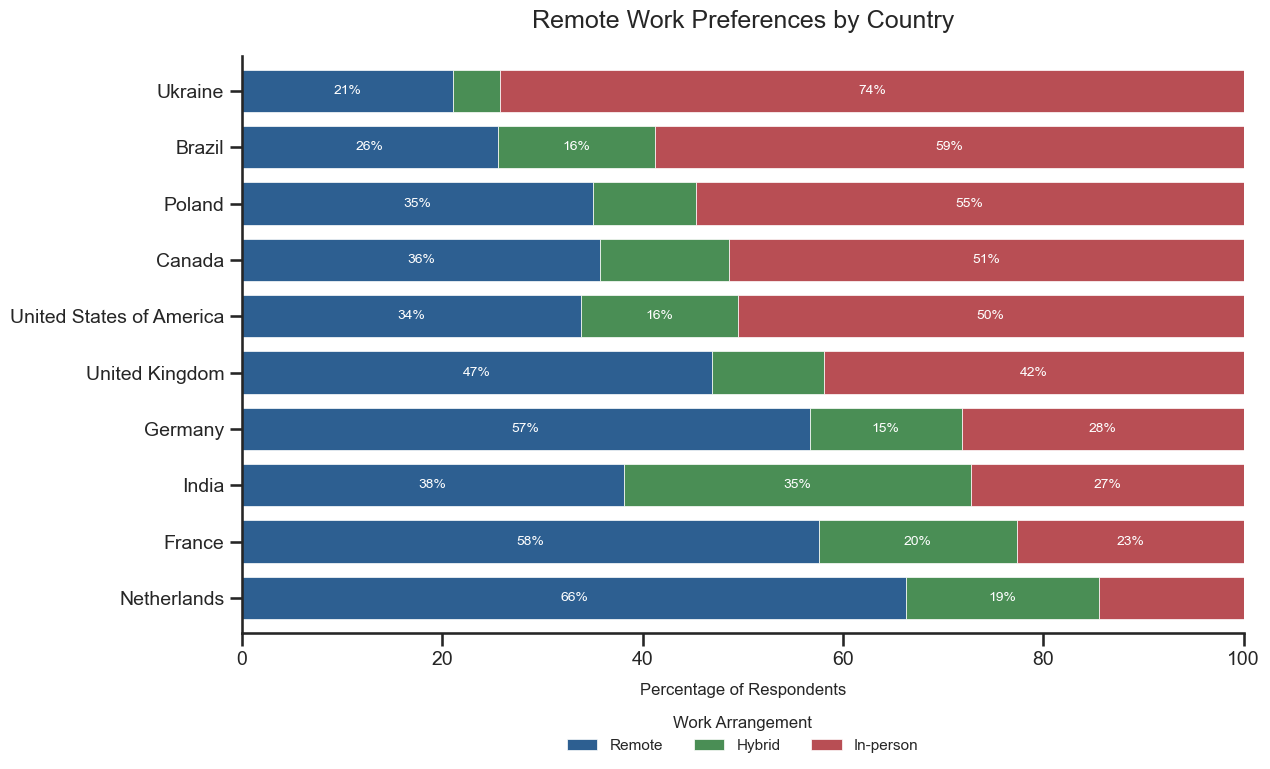

In [129]:
# Get top countries by response count
top_countries = df['Country'].value_counts().nlargest(10).index.tolist()
df_top = df[df['Country'].isin(top_countries)].copy()

# Calculate remote work percentages by country
remote_pct = pd.crosstab(df_top['Country'], df_top['RemoteWork'], normalize='index') * 100

# Sort data by remote preference
remote_pct = remote_pct.sort_values(by='Remote', ascending=True)

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(14, 9))
fig.subplots_adjust(left=0.3, right=0.9, top=0.85, bottom=0.2)

remote_pct.plot(
    kind='barh',
    stacked=True,
    color=['#2d5f91', '#4a8e55', '#b84e54'],
    width=0.75,
    ax=ax,
    edgecolor='w',
    linewidth=0.5
)

plt.title("Remote Work Preferences by Country", pad=20)
plt.xlabel("Percentage of Respondents", fontsize=12, labelpad=10)
plt.ylabel("")
plt.xlim(0, 100)

# Add percentage labels for largest segments
for i, (idx, row) in enumerate(remote_pct.iterrows()):
    total = 0
    for seg in row.items():
        if seg[1] > 15:  # Only label segments larger than 15%
            ax.text(total + seg[1]/2, i, 
                    f'{seg[1]:.0f}%', 
                    ha='center', va='center',
                    color='white', fontsize=10)
        total += seg[1]

# Add legend
legend = ax.legend(
    title='Work Arrangement',
    labels=['Remote', 'Hybrid', 'In-person'],
    loc='upper center',
    bbox_to_anchor=(0.5, -0.12),
    ncol=3,
    frameon=False,
    title_fontsize=12,
    fontsize=11
)

plt.tight_layout(pad=3)
plt.show()

- **Netherlands leads in remote work adoption** (66%), followed by France (58%) and Germany (57%)
- **Ukraine shows the strongest preference for in-person work** (74%)
- European countries generally favor remote work more than others

## **Developer Roles**

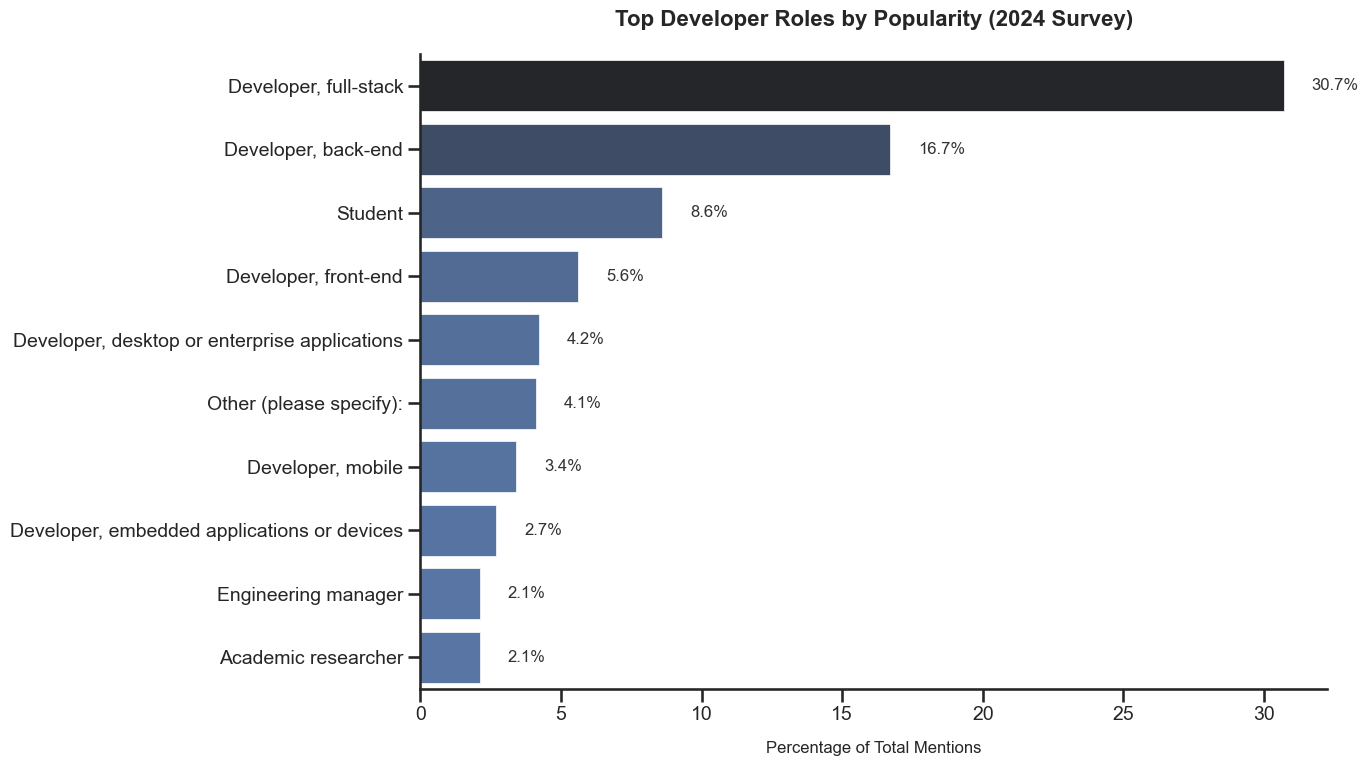

In [152]:
# Process developer role data
dev_roles = df['DevType'].dropna().str.split(';')
flat_roles = [role.strip() for sublist in dev_roles for role in sublist]

# Count top roles
top_roles = dict(Counter(flat_roles).most_common(10))
top_roles_df = pd.DataFrame(list(top_roles.items()), columns=['DevType', 'Count']).sort_values('Count', ascending=False)

# Calculate percentages
total_mentions = len(flat_roles)
top_roles_df['Percentage'] = (top_roles_df['Count'] / total_mentions * 100).round(1)

# Create visualization
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=top_roles_df, 
                x='Percentage', 
                y='DevType',
                palette=palette,
                edgecolor='w',
                hue='Percentage',
                legend=False,
                linewidth=0.5)

plt.title("Top Developer Roles by Popularity (2024 Survey)", 
         fontsize=16, fontweight='semibold', pad=20)
plt.xlabel("Percentage of Total Mentions", fontsize=12, labelpad=12)
plt.ylabel("")

# Add percentage labels
for i, pct in enumerate(top_roles_df['Percentage']):
    ax.text(pct + 1, i, 
           f'{pct}%', 
           va='center',
           fontsize=12,
           color='#333333',
           fontweight='medium')

plt.tight_layout()
plt.show()

- **Full-stack developers dominate** the field (30.7%)
- **Back-end developers** represent the second largest group (16.7%)
- Students make up a surprising 8.6% of respondents, suggesting active pipeline of new talent

## **Job Satisfaction**

**Job Satisfaction by Industry**

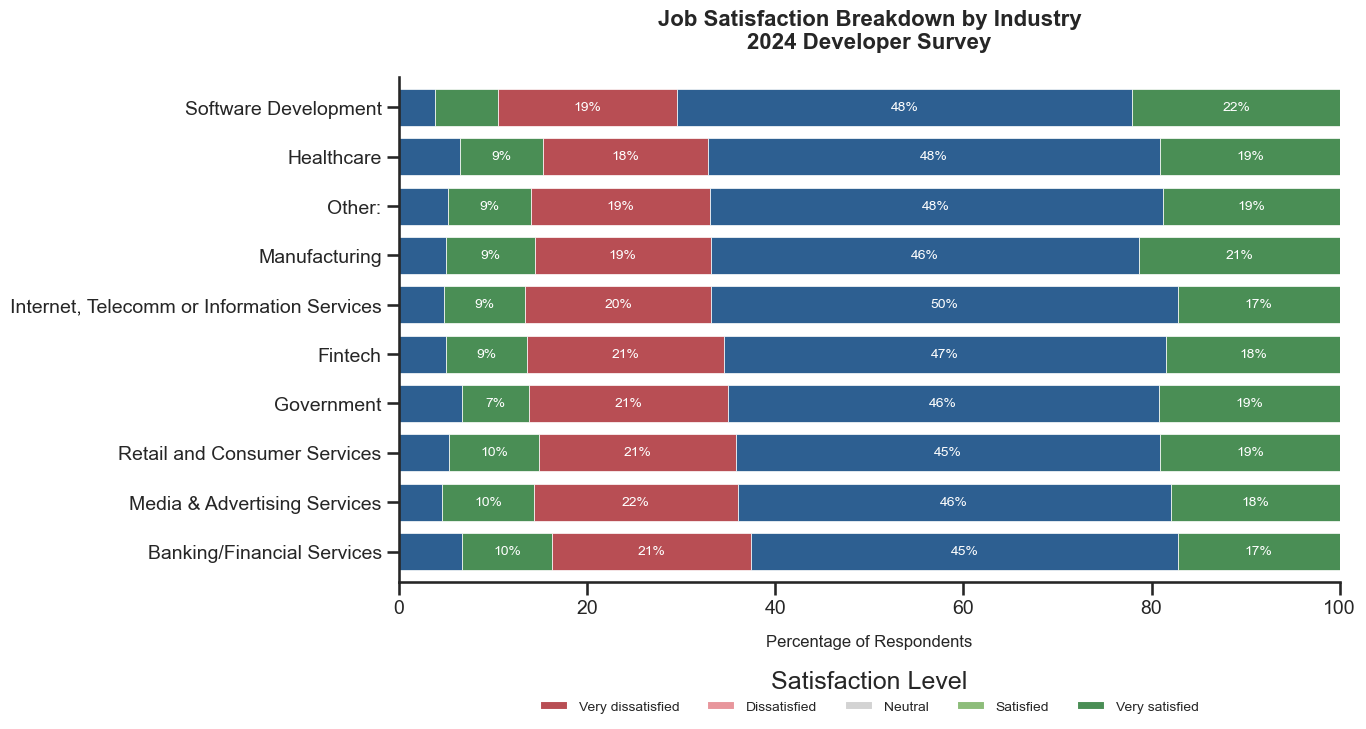

In [ ]:
# Convert numeric fields
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df['YearsCodePro'] = df['YearsCodePro'].fillna(0)

# Bucket satisfaction into labeled categories
def map_satisfaction(score):
    if score >= 9:
        return 'Very satisfied'
    elif score >= 7:
        return 'Satisfied'
    elif score >= 5:
        return 'Neutral'
    elif score >= 3:
        return 'Dissatisfied'
    else:
        return 'Very dissatisfied'

df['JobSatBucket'] = df['JobSat'].dropna().apply(map_satisfaction)

# Crosstab with percentage breakdown
satisfaction_pct = pd.crosstab(df['Industry'], df['JobSatBucket'], normalize='index') * 100

# Limit to top industries
top_industries = df['Industry'].value_counts().head(10).index
satisfaction_pct = satisfaction_pct.loc[top_industries]

# Ensure order of satisfaction levels
ordered_buckets = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
satisfaction_pct = satisfaction_pct[ordered_buckets]

# Define colors for satisfaction levels
satisfaction_palette = {
    'Very dissatisfied': '#b84e54',
    'Dissatisfied': '#e8969c',
    'Neutral': '#d3d3d3',
    'Satisfied': '#8dbd7a',
    'Very satisfied': '#4a8e55'
}

# Sort industries by positive satisfaction
satisfaction_pct['Positive'] = satisfaction_pct['Satisfied'] + satisfaction_pct['Very satisfied']
satisfaction_pct = satisfaction_pct.sort_values('Positive', ascending=True)
satisfaction_pct = satisfaction_pct.drop(columns=['Positive'])

# Create visualization
fig, ax = plt.subplots(figsize=(14, 8))

satisfaction_pct[ordered_buckets].plot(
    kind='barh',
    stacked=True,
    color=['#2d5f91', '#4a8e55', '#b84e54'],
    width=0.75,
    edgecolor='w',
    linewidth=0.5,
    ax=ax
)

plt.title("Job Satisfaction Breakdown by Industry\n2024 Developer Survey", 
         fontsize=16, fontweight='semibold', pad=20)
plt.xlabel("Percentage of Respondents", fontsize=12, labelpad=12)
plt.ylabel("")
plt.xlim(0, 100)

# Add percentage labels for segments above threshold
for container in ax.containers:
    labels = [f"{v:.0f}%" if v > 7 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='white')

# Add legend
legend_elements = [Patch(facecolor=satisfaction_palette[b], label=b) for b in ordered_buckets]
ax.legend(handles=legend_elements,
         title='Satisfaction Level',
         frameon=False,
         loc='upper center',
         bbox_to_anchor=(0.5, -0.15),
         ncol=len(ordered_buckets),
         fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

- **Software Development industry has highest satisfaction levels** (22% very satisfied)
- Media & Advertising shows highest dissatisfaction (22%)
- Most industries maintain similar satisfaction distributions (45-50% neutral)

**Experience Distribution by Industry**

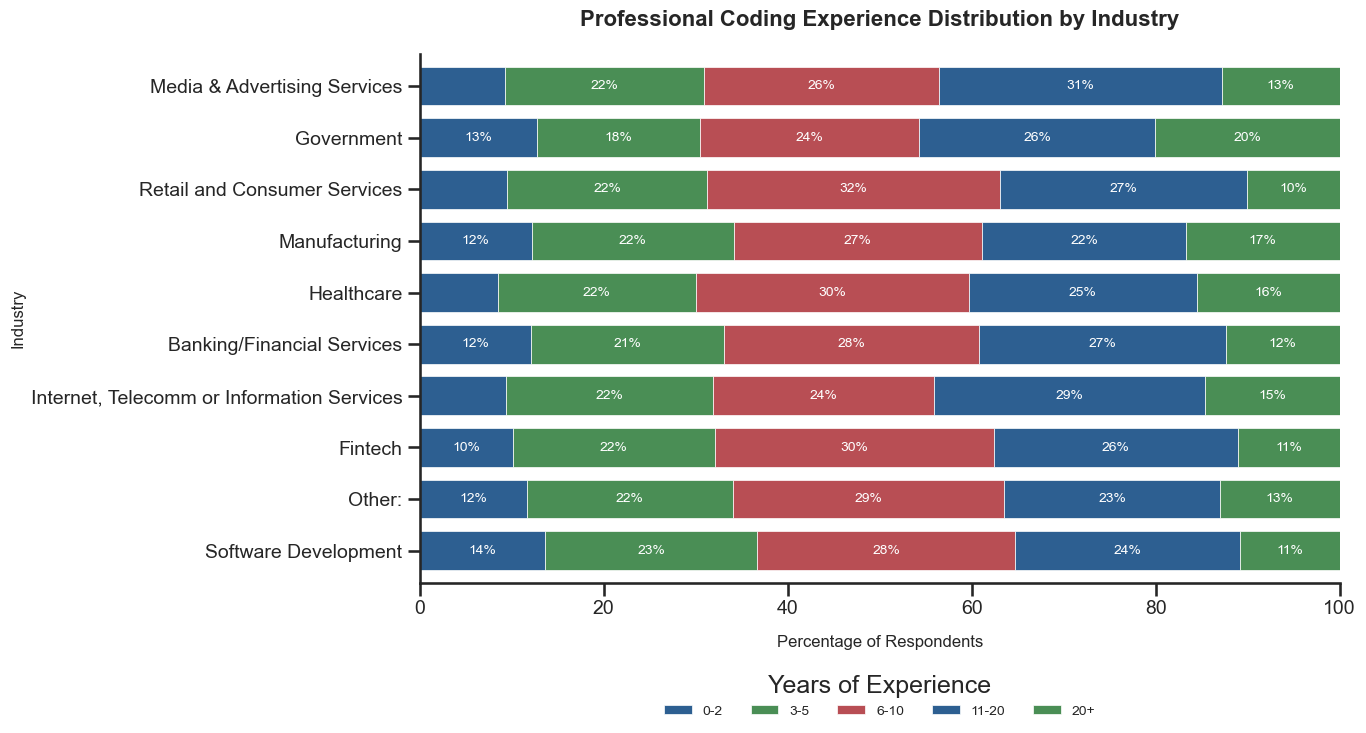

In [ ]:
# Define experience bins
exp_bins = [0, 2, 5, 10, 20, float('inf')]
exp_labels = ['0-2', '3-5', '6-10', '11-20', '20+']

# Prepare data
df['ExpCategory'] = pd.cut(df['YearsCodePro'], bins=exp_bins, labels=exp_labels)

# Calculate percentages
industry_exp = pd.crosstab(df['Industry'], 
                          df['ExpCategory'], 
                          normalize='index').loc[top_industries] * 100

# Create visualization
fig, ax = plt.subplots(figsize=(14, 8))

industry_exp.plot(
    kind='barh',
    stacked=True,
    color=['#2d5f91', '#4a8e55', '#b84e54'],
    width=0.75,
    edgecolor='w',
    linewidth=0.5,
    ax=ax
)

plt.title("Professional Coding Experience Distribution by Industry", 
         fontsize=16, fontweight='semibold', pad=20)
plt.xlabel("Percentage of Respondents", fontsize=12, labelpad=12)
plt.ylabel("Industry", fontsize=12)
plt.xlim(0, 100)

# Add percentage labels
for container in ax.containers:
    labels = [f"{v:.0f}%" if v > 10 else '' for v in container.datavalues]
    ax.bar_label(container, 
                 labels=labels, 
                 label_type='center', 
                 fontsize=10, 
                 color='white')

# Add legend
ax.legend(title='Years of Experience',
         frameon=False,
         loc='upper center',
         bbox_to_anchor=(0.5, -0.15),
         ncol=len(exp_labels),
         fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

- **Media & Advertising has the highest proportion of senior developers** (31% with 11-20 years experience)
- **Government sector has the most experienced developers** (20% with 20+ years)
- Retail and Fintech industries have higher percentages of mid-career developers (6-10 years)

## **Company Size Analysis**

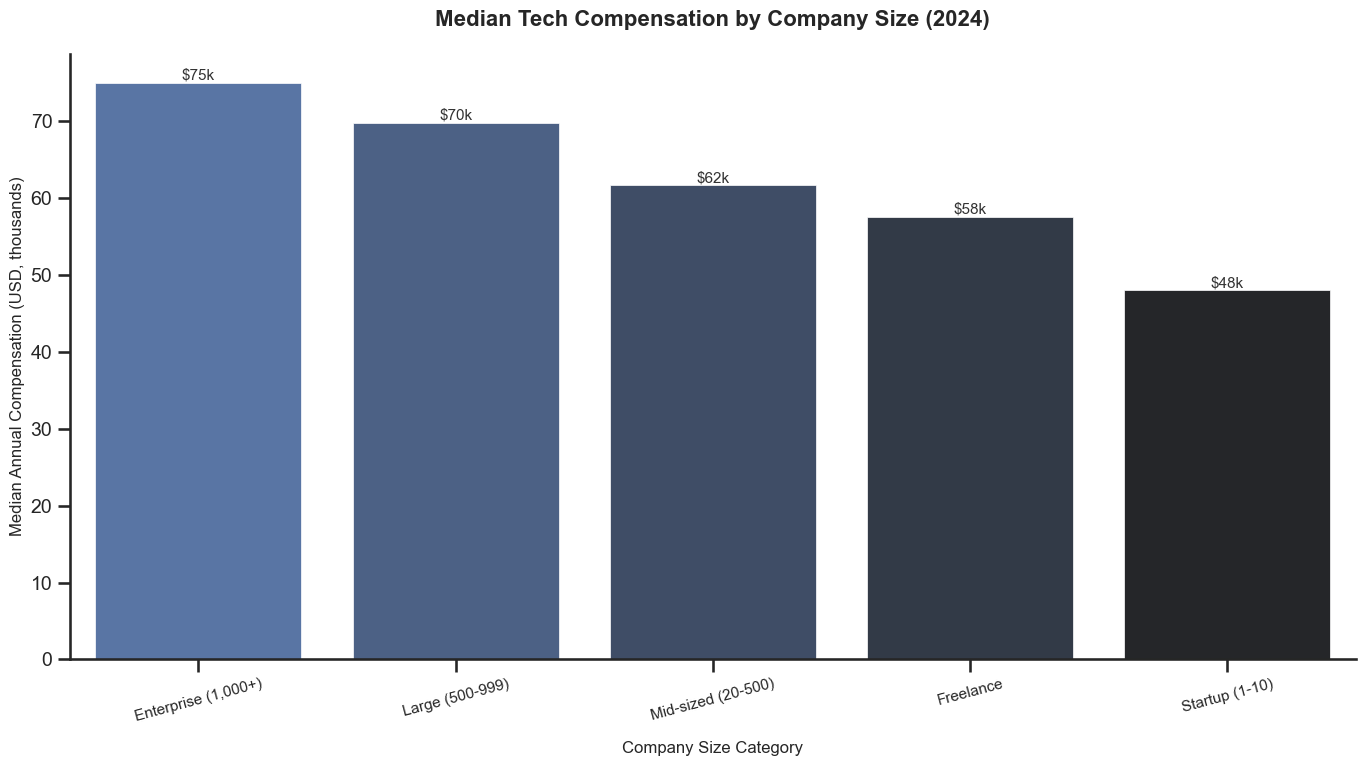

In [134]:
# Improved categorization with explicit mapping
company_size_map = {
    '2 to 9 employees': 'Startup (1-10)',
    '10 to 19 employees': 'Startup (1-10)',
    '20 to 99 employees': 'Mid-sized (20-500)',
    '100 to 499 employees': 'Mid-sized (20-500)',
    '500 to 999 employees': 'Large (500-999)',
    '1,000 to 4,999 employees': 'Enterprise (1,000+)',
    '5,000 to 9,999 employees': 'Enterprise (1,000+)',
    '10,000 or more employees': 'Enterprise (1,000+)',
    'Just me - I am a freelancer, sole proprietor, etc.': 'Freelance',
}

df['CompanyCategory'] = df['OrgSize'].map(company_size_map)

# Filter and calculate median compensation
comp_filtered = df[df['ConvertedCompYearly'] <= df['ConvertedCompYearly'].quantile(0.95)]
comp_by_company = comp_filtered.groupby('CompanyCategory')['ConvertedCompYearly'].median().sort_values(ascending=False)

# Create visualization
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=comp_by_company.index,
                y=comp_by_company.values/1000,
                palette=palette,
                order=['Enterprise (1,000+)', 'Large (500-999)', 'Mid-sized (20-500)', 
                       'Freelance', 'Startup (1-10)'],
                edgecolor='w',
                linewidth=0.5)

plt.title("Median Tech Compensation by Company Size (2024)", 
         fontsize=16, fontweight='semibold', pad=20)
plt.xlabel("Company Size Category", fontsize=12, labelpad=12)
plt.ylabel("Median Annual Compensation (USD, thousands)", fontsize=12)

# Add value labels
for p in ax.patches:
    ax.annotate(f"${p.get_height():.0f}k", 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', 
                va='center', 
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=11,
                color='#333333')

plt.xticks(fontsize=11, rotation=15)
plt.tight_layout()
plt.show()

- **Clear correlation between company size and compensation**
- Enterprise companies ($75k) pay 56% more than startups ($48k)
- Freelancers earn competitively ($58k) compared to mid-sized companies ($62k)

**Median job satisfaction**

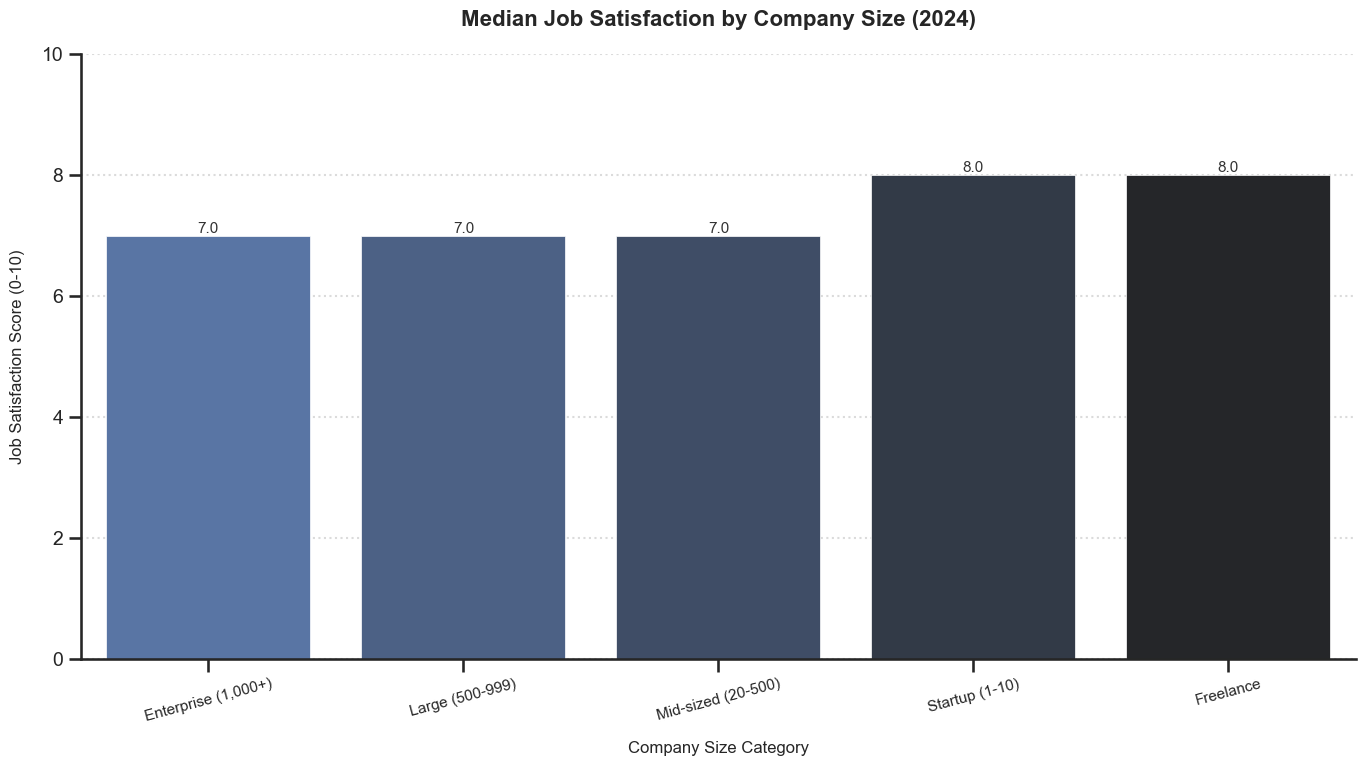

In [135]:
# Calculate median job satisfaction
job_sat_by_company = df.groupby('CompanyCategory')['JobSat'].median().sort_values(ascending=False)
job_sat_by_company = job_sat_by_company.reindex(['Enterprise (1,000+)', 'Large (500-999)', 
                                                'Mid-sized (20-500)', 'Startup (1-10)', 
                                                'Freelance'])

# Create visualization
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=job_sat_by_company.index,
                y=job_sat_by_company.values,
                palette=palette,
                edgecolor='w',
                linewidth=0.5)

plt.title("Median Job Satisfaction by Company Size (2024)", 
         fontsize=16, fontweight='semibold', pad=20)
plt.xlabel("Company Size Category", fontsize=12, labelpad=12)
plt.ylabel("Job Satisfaction Score (0-10)", fontsize=12, labelpad=12)

# Add value labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', 
                va='center', 
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=11,
                color='#333333')

ax.grid(axis='y', linestyle=':', alpha=0.7)
plt.xticks(fontsize=11, rotation=15)
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

- **Startups and freelance work offer higher satisfaction** (8.0/10)
- Larger organizations show consistently lower satisfaction (7.0/10)
- The satisfaction gap is significant despite higher compensation at larger companies

## **Developer by Country**

**Coding Experience by Country**

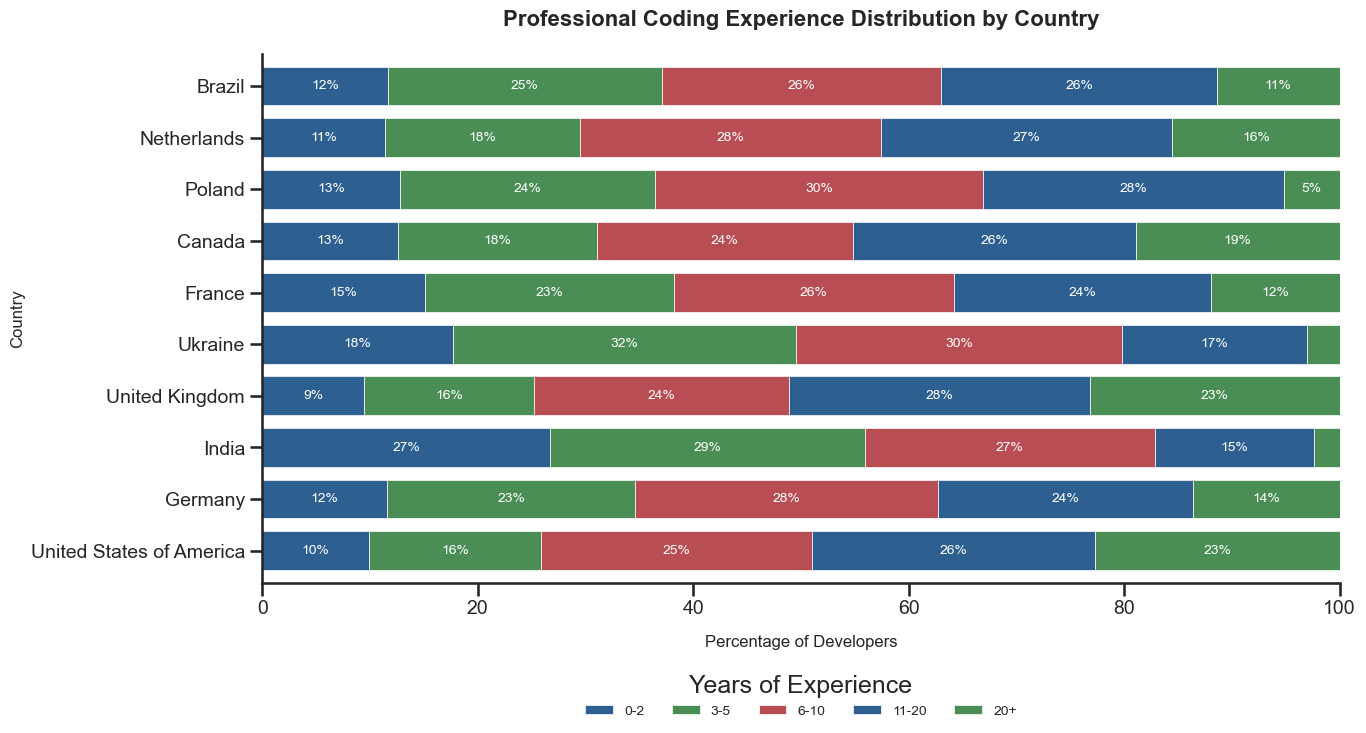

In [ ]:
# Create experience bins
exp_bins = [0, 2, 5, 10, 20, float('inf')]
exp_labels = ['0-2', '3-5', '6-10', '11-20', '20+']

# Prepare data
df_top = df[df['Country'].isin(top_countries)].copy()
df_top['ExpCategory'] = pd.cut(df_top['YearsCodePro'], bins=exp_bins, labels=exp_labels)

# Calculate percentages
country_exp = pd.crosstab(df_top['Country'], df_top['ExpCategory'], normalize='index').loc[top_countries] * 100

# Create visualization
fig, ax = plt.subplots(figsize=(14, 8))

country_exp.plot(
    kind='barh',
    stacked=True,
    color=['#2d5f91', '#4a8e55', '#b84e54'],
    width=0.75,
    edgecolor='w',
    linewidth=0.5,
    ax=ax
)

plt.title("Professional Coding Experience Distribution by Country", 
         fontsize=16, fontweight='semibold', pad=20)
plt.xlabel("Percentage of Developers", fontsize=12, labelpad=12)
plt.ylabel("Country", fontsize=12)
plt.xlim(0, 100)

# Add percentage labels
for container in ax.containers:
    labels = [f"{v:.0f}%" if v > 5 else '' for v in container.datavalues]
    ax.bar_label(container, 
                 labels=labels, 
                 label_type='center', 
                 fontsize=10, 
                 color='white')

# Add legend
ax.legend(title='Years of Experience',
         frameon=False,
         loc='upper center',
         bbox_to_anchor=(0.5, -0.15),
         ncol=len(exp_labels),
         fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

- **India has the youngest developer workforce** with 27% having 0-2 years of experience
- **United Kingdom and United States have the most senior developers** (23% with 20+ years)
- Ukraine has a unique distribution with high concentration in mid-career developers (32% with 3-5 years)

**Developer Types by Country**

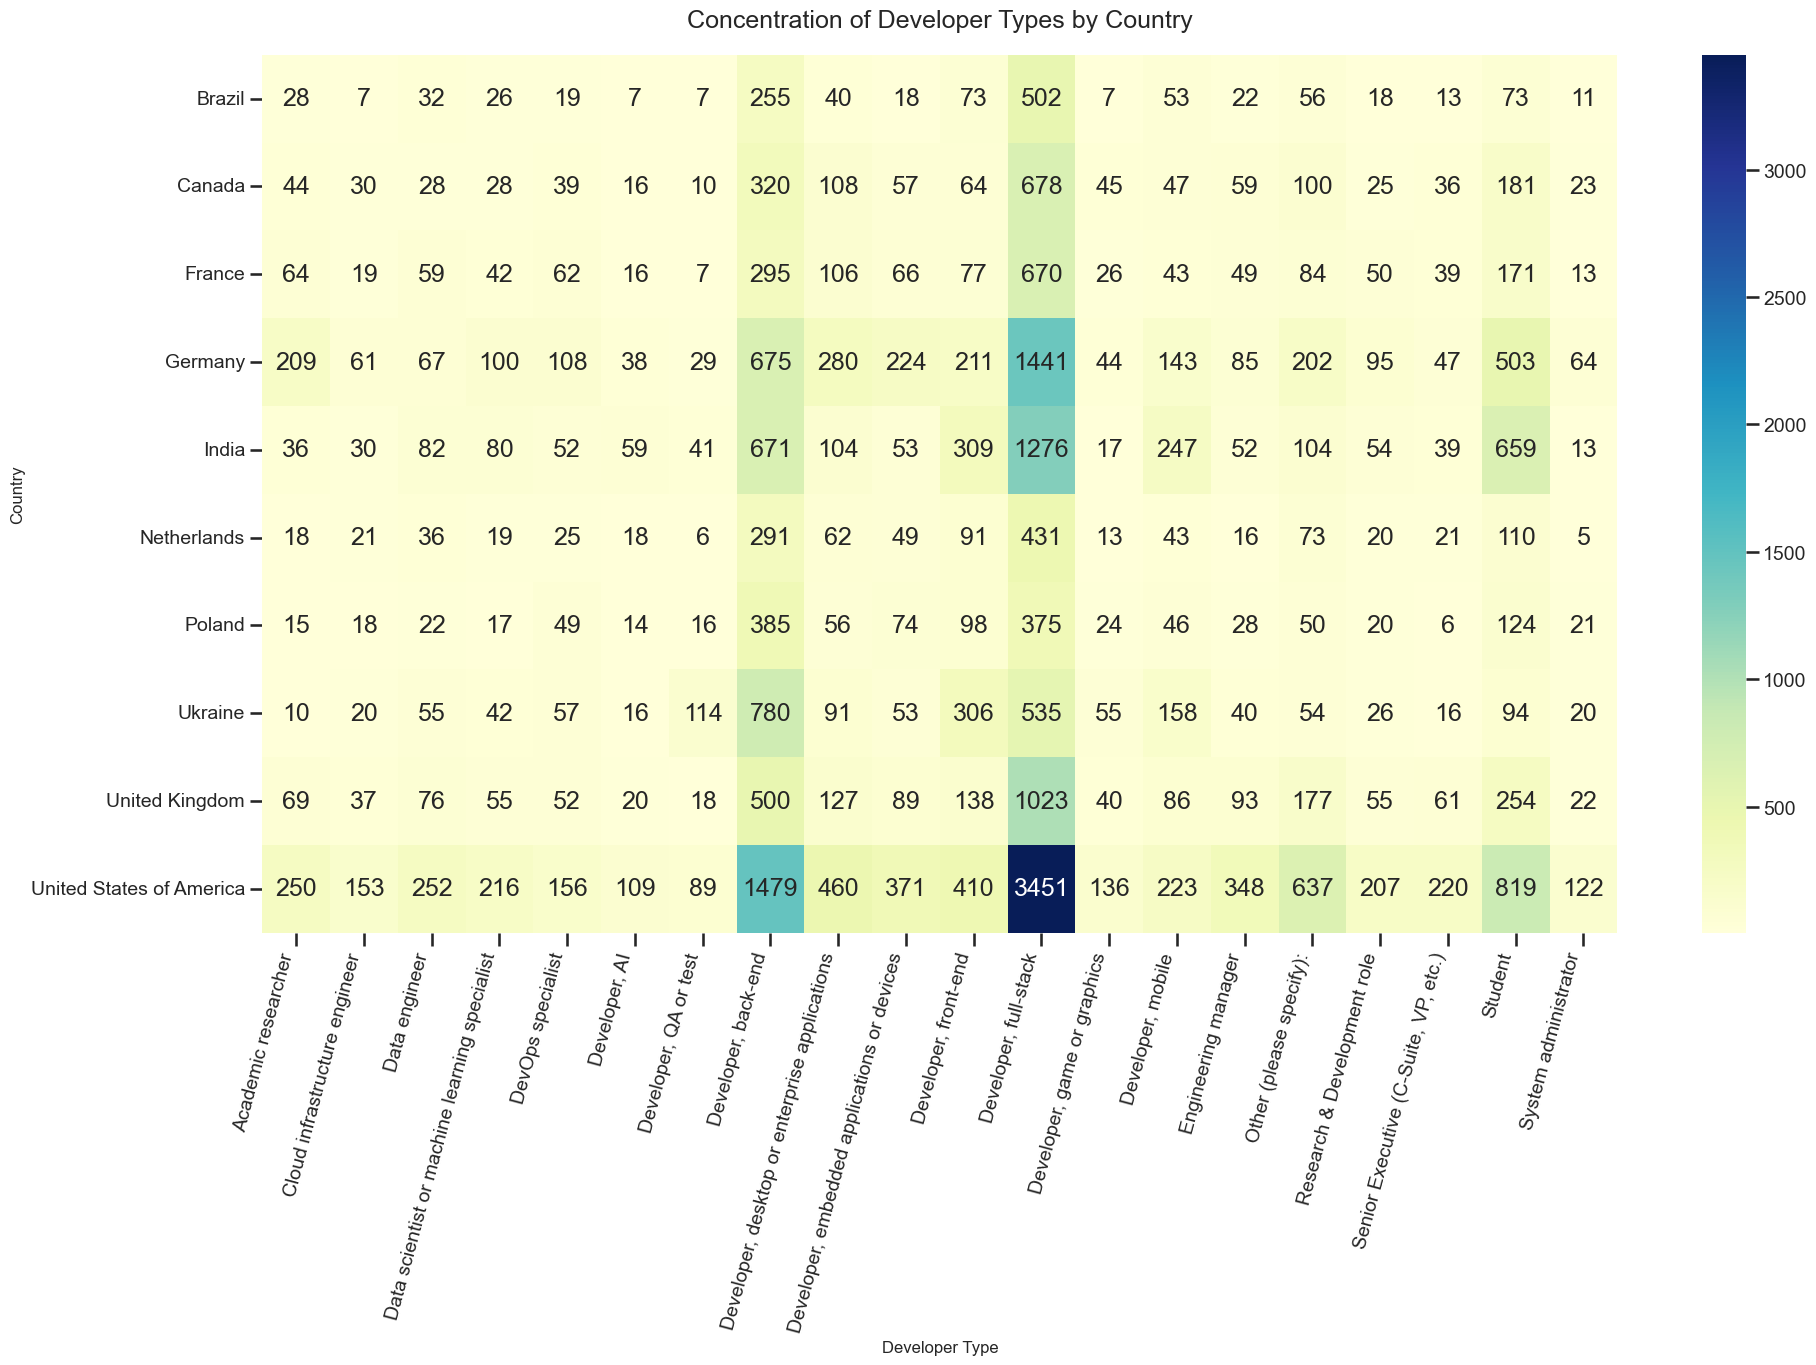

In [137]:
# Explode the DevType column
df_devtype = explode_column(df, 'DevType')
devtype_counts = df_devtype.groupby(['Country', 'DevType']).size().reset_index(name='Count')

# Filter to top countries
top_countries_count = 10
top_countries = df['Country'].value_counts().head(top_countries_count).index.tolist()
devtype_top = devtype_counts[devtype_counts['Country'].isin(top_countries)]

# Find the top developer types by overall usage
devtype_global = devtype_top.groupby('DevType')['Count'].sum().reset_index()
devtype_global = devtype_global.sort_values(by='Count', ascending=False).head(20)
top_20_devtypes = devtype_global['DevType'].tolist()

# Filter to top developer types
devtype_top_20 = devtype_top[devtype_top['DevType'].isin(top_20_devtypes)]

# Pivot for the heatmap
pivot_devtype = devtype_top_20.pivot(
    index='Country', columns='DevType', values='Count'
).fillna(0)

# Plot
plt.figure(figsize=(20, 14))
ax = sns.heatmap(
    pivot_devtype,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu"
)

plt.title("Concentration of Developer Types by Country", pad=20)
plt.xlabel("Developer Type", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.show()

- **United States leads in total developer workforce** with 3,451 full-stack developers 
- **Germany ranks second** with 1,441 full-stack developers
- Backend developers represent the largest specialized role across all countries
- System administrators show consistent presence across all regions

**Technology Adoption by Country**

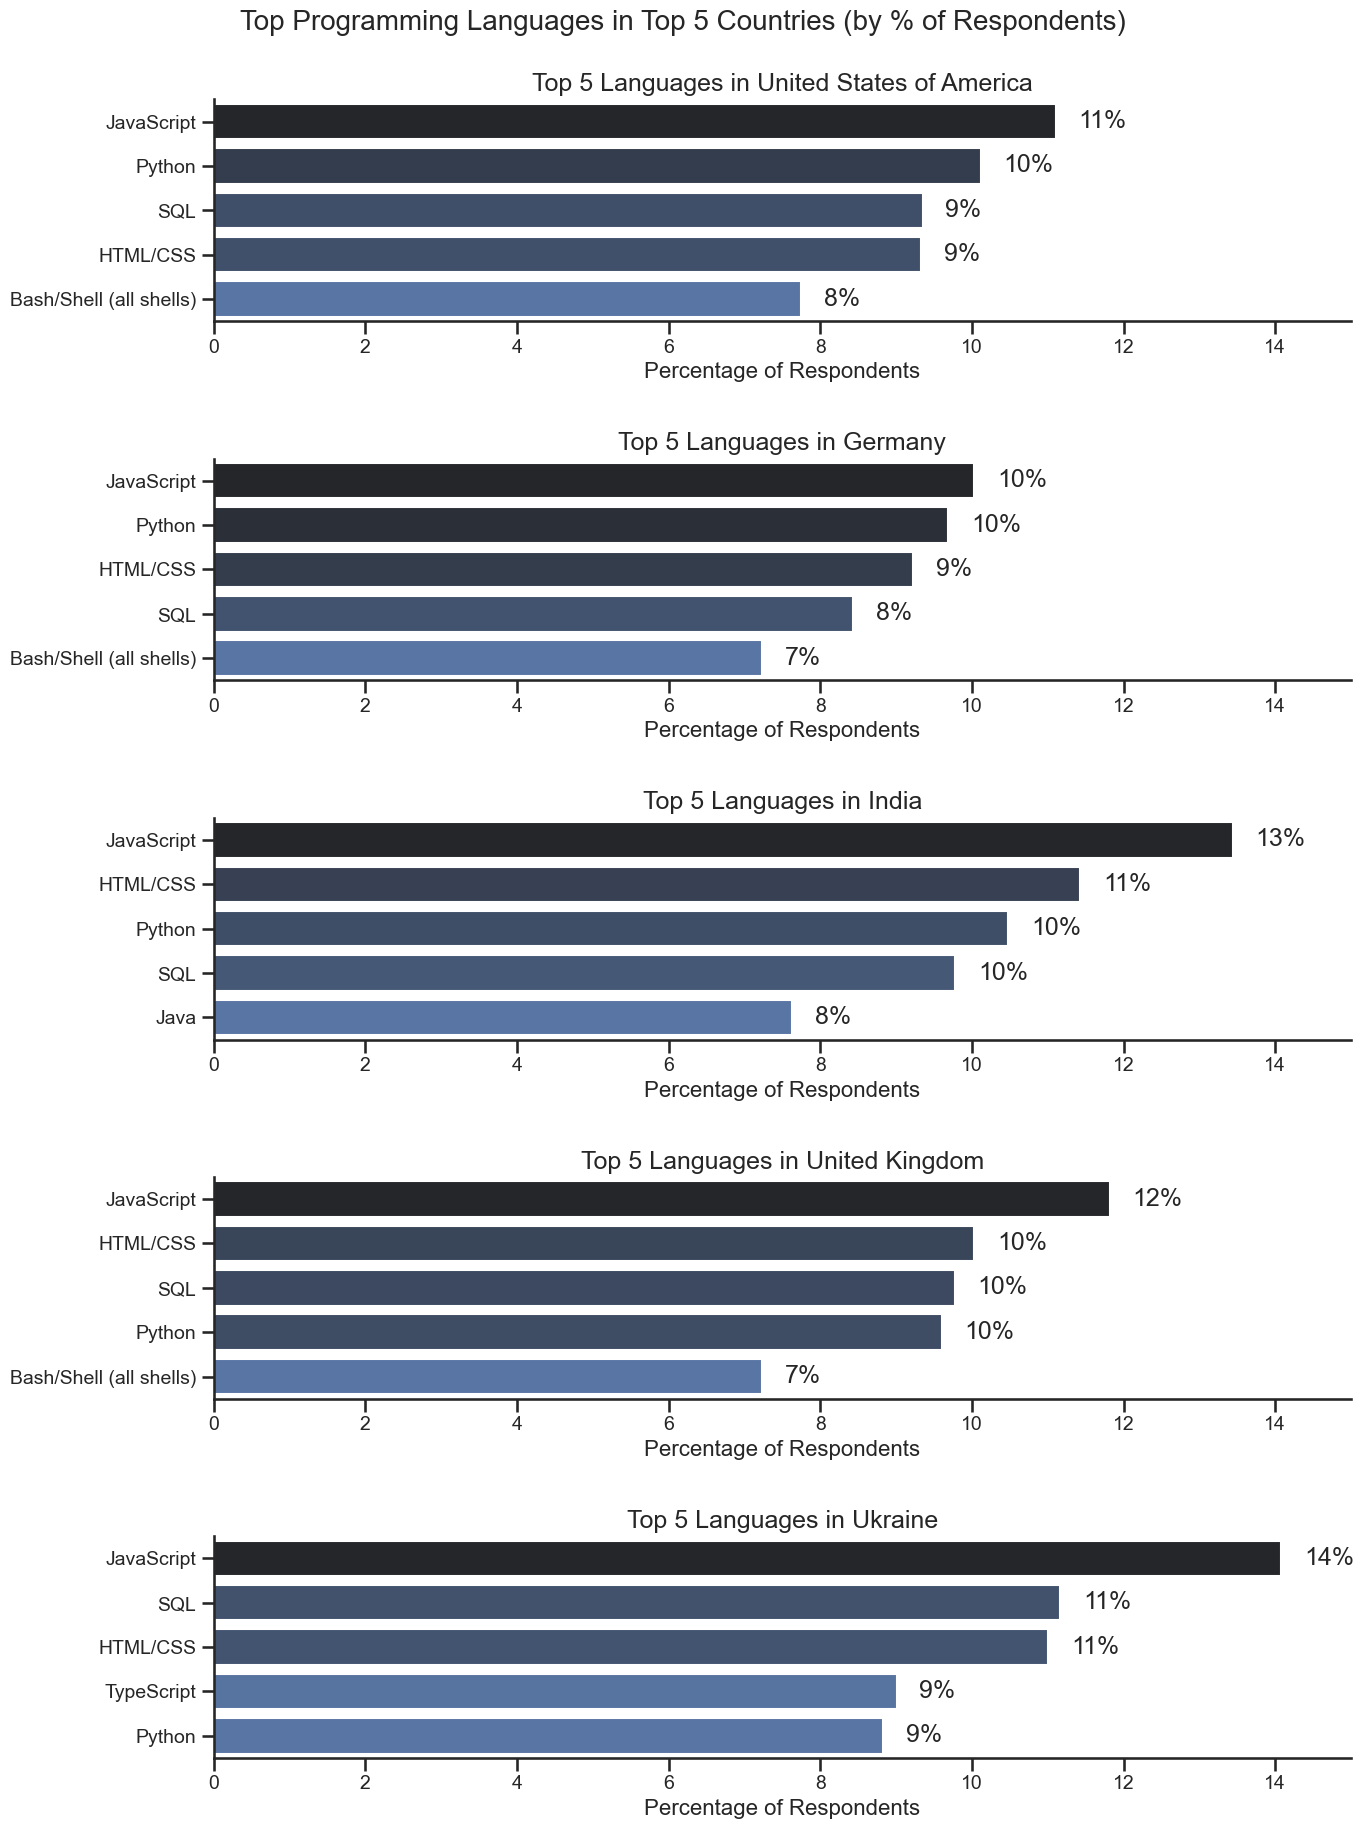

In [138]:
# Explode LanguageHaveWorkedWith column while keeping Country
df_lang = explode_column(df[['Country', 'LanguageHaveWorkedWith']], 'LanguageHaveWorkedWith')

# Filter data to include only top countries
lang_subset = df_lang[df_lang['Country'].isin(top_countries)]

# Group and count language usage
lang_counts = lang_subset.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

lang_counts['Percent'] = lang_counts.groupby('Country')['Count'].transform(lambda x: (x / x.sum()) * 100)

top_langs_by_country = lang_counts.groupby('Country', group_keys=False).apply(
    lambda x: x.sort_values('Percent', ascending=False).head()
)

# Plot
fig, ax = plt.subplots(5, 1, figsize=(14, 18))
axes = ax.flatten()

for i, country in enumerate(top_countries[:5]):  # Plot top 5 countries
    df_country = top_langs_by_country[top_langs_by_country['Country'] == country]

    sns.barplot(
        data=df_country,
        x='Percent',
        y='LanguageHaveWorkedWith',
        ax=axes[i],
        palette=palette,
        hue='Percent'
    )

    axes[i].set_title(f"Top 5 Languages in {country}")
    axes[i].set_xlabel("Percentage of Respondents")
    axes[i].set_ylabel("")
    axes[i].set_xlim(0, 15)

    # Annotate bars with percentages
    for j, perc in enumerate(df_country['Percent']):
        axes[i].text(perc + 0.3, j, f"{perc:.0f}%", va='center')
    
    # Remove legend
    if axes[i].get_legend() is not None:
        axes[i].get_legend().remove()

plt.tight_layout(h_pad=2)
fig.suptitle("Top Programming Languages in Top 5 Countries (by % of Respondents)", y=1.02)
plt.show()

- **JavaScript dominates across all major markets** (11-14% adoption)
- Ukraine shows the strongest JavaScript preference (14%)
- India uniquely has higher HTML/CSS usage (11%) and retains significant Java adoption (8%)
- SQL remains among top 3 languages in all countries except Germany

**Compensation and Experience by Country**

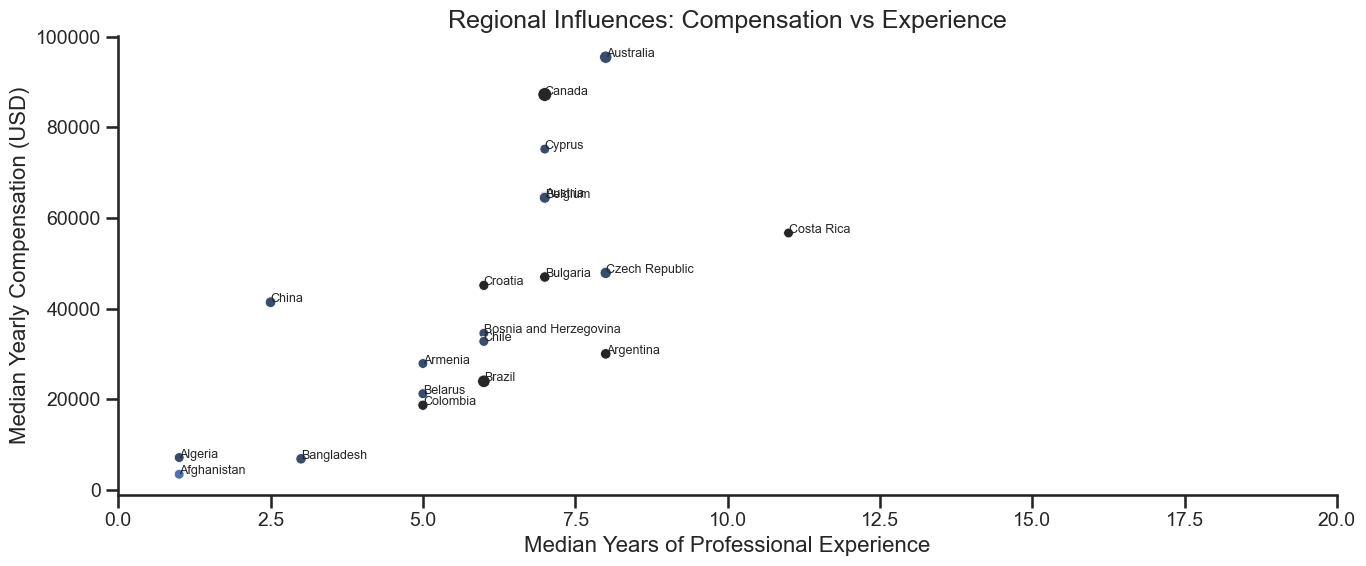

In [158]:
# Calculate regional statistics
regional_stats = df.groupby('Country').agg(
    MedianCompensation=('ConvertedCompYearly', 'median'),
    MedianExperience=('YearsCodePro', 'median'),
    Count=('ResponseId', 'count'),
    MedianJobSat=('JobSat', 'median')
).reset_index()

# Filter for countries with sufficient data
regional_stats = regional_stats[regional_stats['Count'] >= 50].head(20)

# Create a scatter plot
plt.figure(figsize=(14, 6))
scatter = sns.scatterplot(x='MedianExperience', y='MedianCompensation', hue='MedianJobSat',
                          size='Count', sizes=(50, 100), data=regional_stats, palette=palette)
plt.title("Regional Influences: Compensation vs Experience")
plt.xlabel("Median Years of Professional Experience")
plt.ylabel("Median Yearly Compensation (USD)")

# Annotate points with country names
for idx, row in regional_stats.iterrows():
    plt.text(row['MedianExperience'], row['MedianCompensation'], row['Country'], fontsize=9)

plt.xlim(0, 20)
plt.tight_layout()
plt.legend().remove()
plt.show()

- **Strong compensation disparity exists** with similar experience levels
- Australia ($95k) and Canada ($87k) lead in median compensation with 7-8 years experience
- Afghanistan, Nigeria, Bangladesh pay under $10k with 1-3 years median experience
- Experience alone doesn't explain compensation differences (regional factors dominate)

# **Compensation vs. Cost of Living**

In [140]:
# Load and merge cost of living dataset with compensation data
col_data.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [141]:
# Group by Country to compute median compensation and response count
median_comp_by_country = df.groupby('Country').agg(
    MedianCompensation=('ConvertedCompYearly', 'median'),
    Count=('ResponseId', 'count')
).reset_index()

In [142]:
# Merge median compensation with COL dataset
merged = pd.merge(median_comp_by_country, col_data, on='Country', how='left')

# Drop rows with missing cost of living data
merged = merged.dropna(subset=['Cost of Living Plus Rent Index', 'Local Purchasing Power Index'])

# Calculate affordability score
merged['AffordabilityScore'] = merged['MedianCompensation'] / merged['Cost of Living Plus Rent Index']

# Create scatter plot
top_30 = merged.head(30)

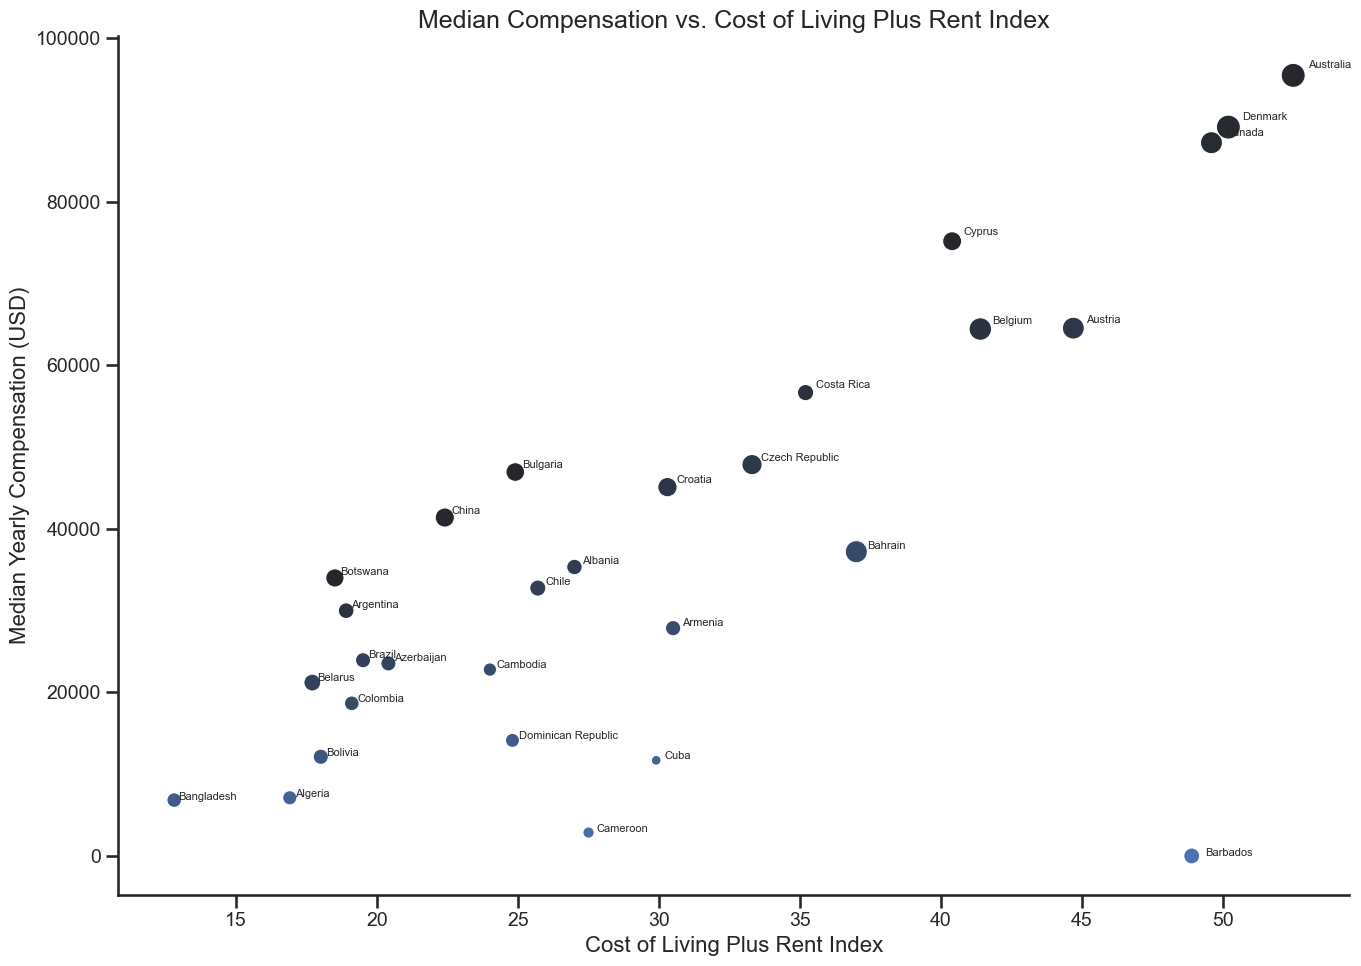

In [143]:
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(data=top_30, 
                          x='Cost of Living Plus Rent Index', 
                          y='MedianCompensation',
                          size='Local Purchasing Power Index', 
                          hue='AffordabilityScore', 
                          sizes=(50, 300), 
                          palette=palette)

plt.title("Median Compensation vs. Cost of Living Plus Rent Index")
plt.xlabel("Cost of Living Plus Rent Index")
plt.ylabel("Median Yearly Compensation (USD)")

# Annotate points with country names
for i, row in top_30.iterrows():
    plt.text(row['Cost of Living Plus Rent Index']*1.01, 
             row['MedianCompensation']*1.01, 
             row['Country'], 
             fontsize=8)

plt.tight_layout()
plt.legend().remove()
plt.show()

- **Clear correlation between cost of living and compensation**
- Australia, Denmark, and Canada offer highest absolute compensation ($90k+)
- Barbados shows unique pattern with high cost of living but very low compensation
- Middle-tier economies (Bulgaria, Croatia, Czech Republic) cluster in the middle range

### Affordability Ranking

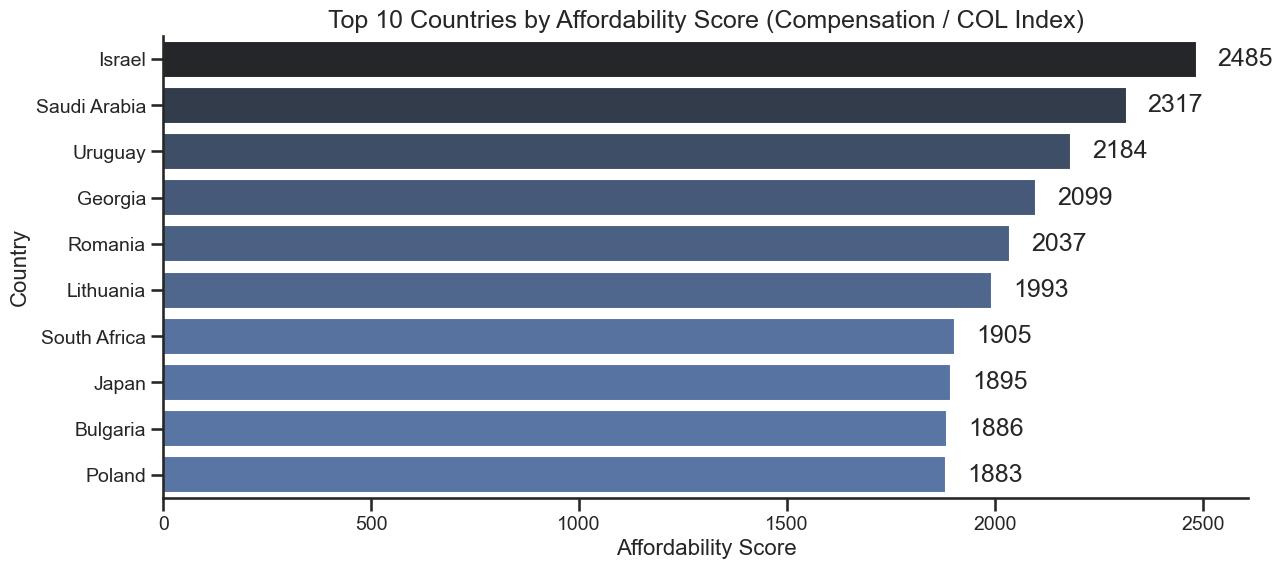

In [144]:
# Bar plot of top countries by affordability score
top_affordable = merged.sort_values('AffordabilityScore', ascending=False).head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x='AffordabilityScore', y='Country', 
            data=top_affordable, 
            hue='AffordabilityScore', 
            palette=palette)

# Add value labels
for i, value in enumerate(top_affordable['AffordabilityScore']):
    plt.text(value + 50, i, f"{value:.0f}", va='center')

plt.title("Top 10 Countries by Affordability Score (Compensation / COL Index)")
plt.xlabel("Affordability Score")
plt.ylabel("Country")
plt.legend().remove()
plt.show()

- **Israel offers the best compensation relative to living costs** (2,485 affordability score)
- Eastern European countries (Romania, Lithuania, Poland, Bulgaria) show excellent affordability
- Japan ranks surprisingly high (8th) despite perception as high-cost location
- Emerging economies dominate the top 10 affordability rankings

### Local Purchasing Power

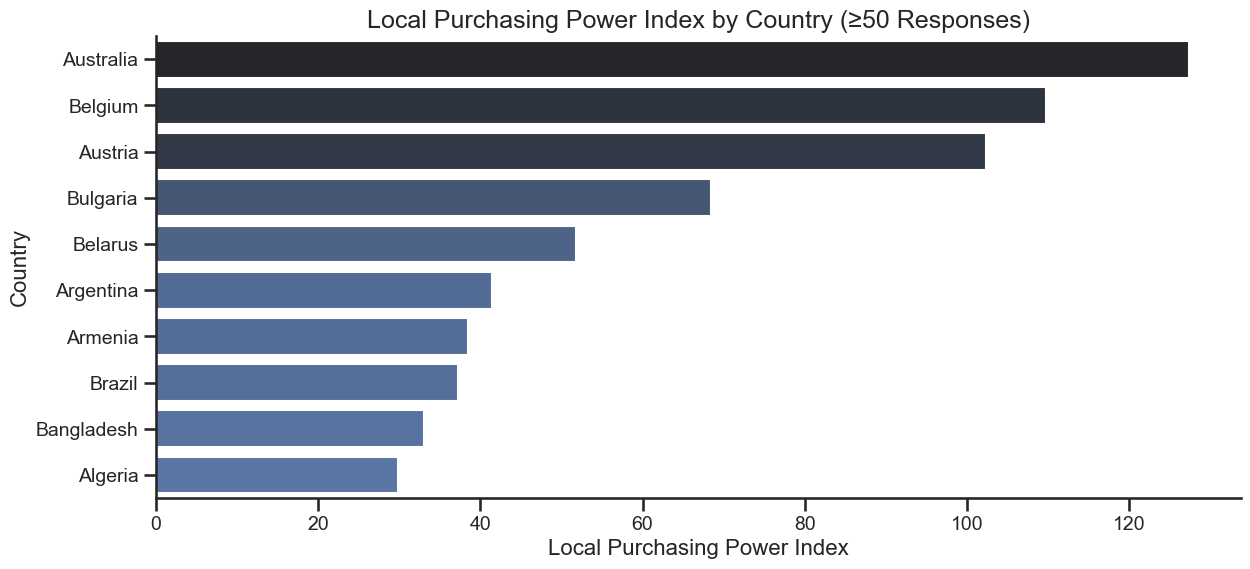

In [145]:
# Filter countries with sufficient responses
filtered = merged[merged['Count'] >= 50].copy().head(10)
filtered = filtered.sort_values('Local Purchasing Power Index', ascending=False)

# Create bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x='Local Purchasing Power Index', 
            y='Country', 
            data=filtered, 
            hue='Local Purchasing Power Index',
            palette=palette)

plt.title("Local Purchasing Power Index by Country (≥50 Responses)")
plt.xlabel("Local Purchasing Power Index")
plt.ylabel("Country")
plt.legend().remove()
plt.show()

- **Australia leads in local purchasing power** for developers
- Belgium and Austria follow closely in purchasing power
- Sharp decline visible between developed and developing economies
- Bottom-ranked countries (Algeria, Bangladesh, Brazil) have less than 1/3 the purchasing power of top countries

# **Key Findings**

1. **The global developer landscape is geographically diverse yet technically cohesive**
   - While developers worldwide use similar core technologies, their work experiences and economic realities vary dramatically by location
   - Remote work adoption is highly uneven, with Netherlands (66%) embracing it while Ukraine (74%) strongly prefers in-person work

2. **Compensation patterns reveal paradoxes across regions and company types**
   - Higher pay doesn't translate to greater satisfaction (enterprise employees earn more but are less satisfied)
   - Regional disparities are extreme (developers with similar experience earn 10x more in Australia than in Bangladesh)
   - Affordability metrics often contradict absolute compensation (Israel and Eastern Europe offer excellent value)

3. **Full-stack development dominates the global industry**
   - Nearly one-third of developers worldwide identify as full-stack
   - This trend transcends geographical boundaries, indicating universal demand for versatile technical skills
   - Backend specialization remains the second most valued skill set across regions

4. **Self-directed learning has replaced traditional education pathways**
   - Online resources (20.2%) are the primary learning method
   - Formal education alone ranks low (3.5%) despite high degree attainment (67% have Bachelor's degrees)
   - Hybrid learning approaches combining multiple methods are increasingly common

5. **Market maturity varies significantly by country and industry sector**
   - India shows a young developer population (27% with 0-2 years experience)
   - UK and US maintain balanced experience distribution across all levels
   - Government and media sectors employ more senior developers, while fintech and retail skew mid-career

# **Recommendations**

1. **For employers and organizations**
   - Implement flexible work policies tailored to regional preferences and age demographics
   - Reconsider compensation strategies to address total value proposition beyond salary
   - Leverage regional talent pools strategically, particularly in high-affordability areas like Eastern Europe

2. **For developers planning career moves**
   - Evaluate opportunities based on affordability metrics rather than raw salary figures
   - Invest in versatile skill development with full-stack capabilities plus selected specializations
   - Consider relocation to "sweet spot" countries (Israel, Romania, Lithuania) offering excellent compensation relative to living costs

3. **For education providers**
   - Focus curricula on core technologies with global relevance (JavaScript, Python, SQL)
   - Integrate self-directed learning approaches that mirror industry practices
   - Develop specialized tracks aligned with regional industry demands

4. **For policymakers in developing regions**
   - Address purchasing power disparities to prevent brain drain
   - Invest in digital infrastructure supporting remote work capabilities
   - Create incentives for international companies to establish regional development centers

# **Conclusion**

The 2024 global developer landscape reveals a profession at an interesting inflection point: technically unified yet economically fragmented. While developers worldwide share common technical foundations, their experiences vary dramatically based on location, company size, and industry sector.

The disconnect between absolute compensation and quality of life stands out as particularly significant. Developers in countries like Israel and Eastern Europe often achieve better economic outcomes than counterparts in traditionally high-paying but expensive markets. This suggests the global competition for developer talent may increasingly shift toward regions offering the optimal combination of compensation, cost of living, and work flexibility.

As remote work continues transforming the industry, these regional differences may either intensify as companies leverage global talent pools or gradually equalize as geography becomes less relevant. Understanding these nuanced patterns is essential for all stakeholders navigating the continuously evolving technology landscape, where success increasingly depends on balancing global technical trends with regional economic realities.